**Sawyer Strong & Erik Cohen**

Fall 2019

CS 343: Neural Networks

Project 2: Multi-layer Perceptrons

**Draft due 11:59pm Thurs Sept 26**


Summary of files in this project:
- `softmax_layer.ipynb`
- `single_layer_net.py`
- `preprocess_data.py`
- `mlp.ipynb`
- `mlp.py`

**REMINDER**: Submit rubric on Google Classroom

In [5]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt

# for obtaining the STL-dataset
import load_stl10_dataset

# for preprocessing dataset
import preprocess_data

# Set the color style so that Professor Layton can see your plots
plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])
# Make the font size larger
plt.rcParams.update({'font.size': 20})

# Turn off scientific notation when printing
np.set_printoptions(suppress=True, precision=3)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

## Data

### a. STL-10

**TODO**: Run the cell below, to preprocess STL-10 dataset like you did in the other notebook.

In [6]:
# Download the dataset from the internet, convert it to Numpy ndarray, resize to 32x32
# cache it locally on your computer for faster loading next time.
stl_imgs, stl_labels = load_stl10_dataset.load()

# Load in the string names for each class
classes = np.loadtxt(os.path.join('data', 'stl10_binary', 'class_names.txt'), dtype=str)

# Preprocess image pixel values for the MLP net
stl_imgs, stl_labels = preprocess_data.preprocess_stl(stl_imgs, stl_labels)
print(f'stl_imgs dtype is {stl_imgs.dtype} and it should be float64')
print(f'stl_imgs max is {np.max(stl_imgs[:, 1:]):.3f} and it should be 0.668')
print(f'stl_imgs shape is {stl_imgs.shape} and it should be (5000, 3072)')
print(f'stl_labels span {stl_labels.min()}->{stl_labels.max()} and it should be 0->9')
    
x_train, y_train, x_test, y_test, x_val, y_val, x_dev, y_dev = preprocess_data.create_splits(stl_imgs, stl_labels)  
print ('Train data shape: ', x_train.shape)
print ('Train labels shape: ', y_train.shape)
print ('Test data shape: ', x_test.shape)
print ('Test labels shape: ', y_test.shape)
print ('Validation data shape: ', x_val.shape)
print ('Validation labels shape: ', y_val.shape)
print ('dev data shape: ', x_dev.shape)
print ('dev labels shape: ', y_dev.shape)

Found cached numpy arrays the images and labels. Loading them...
Images are: (5000, 32, 32, 3)
Labels are: (5000,)
stl_imgs dtype is float64 and it should be float64
stl_imgs max is 0.668 and it should be 0.668
stl_imgs shape is (5000, 3072) and it should be (5000, 3072)
stl_labels span 0->9 and it should be 0->9
Train data shape:  (3500, 3072)
Train labels shape:  (3500,)
Test data shape:  (500, 3072)
Test labels shape:  (500,)
Validation data shape:  (500, 3072)
Validation labels shape:  (500,)
dev data shape:  (500, 3072)
dev labels shape:  (500,)


### Circle in a square

**TODO** Run the code below from the other notebook to load in the CIS dataset

In [7]:
val_size = 20

cis_train_path = os.path.join('data', 'cis', 'cis_train.dat')
cis_test_path = os.path.join('data', 'cis', 'cis_test.dat')

cis_train_all = np.loadtxt(cis_train_path, delimiter='\t')

# shuffle the data
s_inds = np.arange(len(cis_train_all))
cis_train_all = cis_train_all[s_inds]

cis_train_x = cis_train_all[:, :2]
cis_train_y = cis_train_all[:, 2].astype(int)

cis_val_x = cis_train_x[:val_size]
cis_train_x = cis_train_x[val_size:]
cis_val_y = cis_train_y[:val_size]
cis_train_y = cis_train_y[val_size:]

cis_test_all = np.loadtxt(cis_test_path, delimiter='\t')
cis_test_x = cis_test_all[:, :2]
cis_test_y = cis_test_all[:, 2].astype(int)

print ('CIS Train data shape: ', cis_train_x.shape)
print ('CIS Train labels shape: ', cis_train_y.shape)
print ('CIS Validation data shape: ', cis_val_x.shape)
print ('CIS Validation labels shape: ', cis_val_y.shape)
print ('CIS Test data shape: ', cis_test_x.shape)
print ('CIS Test labels shape: ', cis_test_y.shape)

CIS Train data shape:  (80, 2)
CIS Train labels shape:  (80,)
CIS Validation data shape:  (20, 2)
CIS Validation labels shape:  (20,)
CIS Test data shape:  (10000, 2)
CIS Test labels shape:  (10000,)


### b. Circle in a square dataset

**Properties:**
- 2 classes of features

**TODO**:
1. Download the circle in a square dataset. Folder structure is `<project folder>/data/cis/<cis dat files>`
2. Create numpy arrays for the train/test data and separate variables for the associated labels by running the below code

In [8]:
val_size = 20

cis_train_path = os.path.join('data', 'cis', 'cis_train.dat')
cis_test_path = os.path.join('data', 'cis', 'cis_test.dat')

cis_train_all = np.loadtxt(
cis_train_path, delimiter='\t')

cis_train_x = cis_train_all[:, :2]
cis_train_y = cis_train_all[:, 2].astype(int)

cis_val_x = cis_train_x[:val_size]
cis_train_x = cis_train_x[val_size:]
cis_val_y = cis_train_y[:val_size]
cis_train_y = cis_train_y[val_size:]

cis_test_all = np.loadtxt(cis_test_path, delimiter='\t')
cis_test_x = cis_test_all[:, :2]
cis_test_y = cis_test_all[:, 2].astype(int)

print ('CIS Train data shape: ', cis_train_x.shape)
print ('CIS Train labels shape: ', cis_train_y.shape)
print ('CIS Validation data shape: ', cis_val_x.shape)
print ('CIS Validation labels shape: ', cis_val_y.shape)
print ('CIS Test data shape: ', cis_test_x.shape)
print ('CIS Test labels shape: ', cis_test_y.shape)

CIS Train data shape:  (80, 2)
CIS Train labels shape:  (80,)
CIS Validation data shape:  (20, 2)
CIS Validation labels shape:  (20,)
CIS Test data shape:  (10000, 2)
CIS Test labels shape:  (10000,)


Below, you should see a...black circle in a white unit square :) 

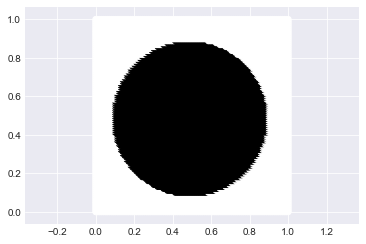

In [9]:
plt.scatter(cis_test_x[:,0], cis_test_x[:,1], c=cis_test_y)
plt.axis('equal')
plt.show()

## Task 3) Implement Multilayer Perceptron (MLP) with softmax activation and cross-entropy loss

Now that we've tested the softmax activation function and cross-entropy loss functions in a single-layer net, let's implement the MLP version.

Much of your work on the single layer net will carry over, so go ahead and copy-paste and modify as needed!

The structure of our MLP will be:

Input layer (X units) -> Hidden layer (Y units) with Rectified Linear activation (ReLu) -> Output layer (Z units) with softmax activation

### a. Implement the following functions in `mlp.py`

- `initialize_wts`
- `accuracy`
- `one_hot`
- `predict`
- `forward`
- `backward`
- `fit`

### b. Test key functions with randomly generated data

In [10]:
from mlp import MLP

In [11]:
# Create a dummy net for debugging
num_inputs = 3
num_features = 6
num_hidden_units = 7
num_classes = 5

net = MLP(num_features, num_hidden_units, num_classes)

In [12]:
# Generate random data and classes
np.random.seed(0)
test_x = np.random.normal(loc=0, scale=100, size=(num_inputs, num_features))
test_y = np.random.uniform(low=0, high=num_classes-1, size=(num_inputs,))
test_y = test_y.astype(int)
print(f'Test input shape: {test_x.shape}')
print(f'Test class vector shape: {test_y.shape}')

Test input shape: (3, 6)
Test class vector shape: (3,)


Test `initialize_wts`

In [13]:
net.initialize_wts(M=num_features, H=num_hidden_units, C=num_classes, std=0.01)
print(f'y wt shape is {net.y_wts.shape} and should be (6, 7)')
print(f'y bias shape is {net.y_b.shape} and should be (7,)')
print(f'z wt shape is {net.z_wts.shape} and should be (7, 5)')
print(f'z bias shape is {net.z_b.shape} and should be (5,)')

print(f'1st few y wts are\n{net.y_wts[:,0]}\nand should be\n[ 0.018 -0.002  0.004  0.007  0.015  0.002]')
print(f'y bias is\n{net.y_b}\nand should be\n[-0.017  0.02  -0.005 -0.004 -0.013  0.008 -0.016]')
print(f'1st few z wts are\n{net.z_wts[:,0]}\nand should be\n[-0.002 -0.    -0.004  0.002  0.001  0.004  0.001]')
print(f'z bias is\n{net.z_b}\nand should be\n[ 0.015  0.019  0.012 -0.002 -0.011]')

y wt shape is (6, 7) and should be (6, 7)
y bias shape is (7,) and should be (7,)
z wt shape is (7, 5) and should be (7, 5)
z bias shape is (5,) and should be (5,)
1st few y wts are
[ 0.018 -0.002  0.004  0.007  0.015  0.002]
and should be
[ 0.018 -0.002  0.004  0.007  0.015  0.002]
y bias is
[-0.017  0.02  -0.005 -0.004 -0.013  0.008 -0.016]
and should be
[-0.017  0.02  -0.005 -0.004 -0.013  0.008 -0.016]
1st few z wts are
[-0.002 -0.    -0.004  0.002  0.001  0.004  0.001]
and should be
[-0.002 -0.    -0.004  0.002  0.001  0.004  0.001]
z bias is
[ 0.015  0.019  0.012 -0.002 -0.011]
and should be
[ 0.015  0.019  0.012 -0.002 -0.011]


Test the `predict` method

In [14]:
test_y_pred = net.predict(test_x)
print(f'Predicted classes are {test_y_pred} and should be [3 0 0]')

Predicted classes are [3 0 0] and should be [3 0 0]


Test the `forward` method focusing on`ReLU`(net act of hidden layer `y`)

In [15]:
_,y_net_act_test,_,_,_ = net.forward(test_x, test_y)

correct_y_act = np.array([[7.66 , 4.47 , 0.804, 9.981, 0.   , 0.   , 0.   ],
       [2.37 , 2.717, 2.18 , 2.552, 0.357, 0.   , 0.   ],
       [3.997, 2.671, 1.195, 3.034, 0.   , 0.   , 0.   ]])

print(f'Your y activation is\n{y_net_act_test}')
print(f'The correct y activation (ReLU) is\n{correct_y_act}')

Your y activation is
[[7.643 4.49  0.799 9.977 0.    0.    0.   ]
 [2.353 2.737 2.175 2.547 0.345 0.    0.   ]
 [3.98  2.691 1.19  3.029 0.    0.    0.   ]]
The correct y activation (ReLU) is
[[7.66  4.47  0.804 9.981 0.    0.    0.   ]
 [2.37  2.717 2.18  2.552 0.357 0.    0.   ]
 [3.997 2.671 1.195 3.034 0.    0.    0.   ]]


Test the `forward` method

In [16]:
_,_,_,probs,_ = net.forward(test_x, test_y)

correct_probs = np.array([[0.219, 0.2  , 0.191, 0.219, 0.171],
       [0.208, 0.204, 0.201, 0.205, 0.183],
       [0.208, 0.202, 0.202, 0.205, 0.183]])

print(f'Your z activation (class probabilities) is\n{probs}')
print(f'The correct z activation (class probabilities) is\n{correct_probs}')
print(f'The sums across rows (for each data sample) are {np.sum(probs, axis=1)}.')
print(f'  You should know what should be :)')

Your z activation (class probabilities) is
[[0.219 0.2   0.191 0.219 0.171]
 [0.208 0.204 0.201 0.205 0.183]
 [0.208 0.202 0.202 0.205 0.183]]
The correct z activation (class probabilities) is
[[0.219 0.2   0.191 0.219 0.171]
 [0.208 0.204 0.201 0.205 0.183]
 [0.208 0.202 0.202 0.205 0.183]]
The sums across rows (for each data sample) are [1. 1. 1.].
  You should know what should be :)


Test the `forward` method, focusing on loss

In [17]:
y_in, y_act ,z_in, z_act, loss = net.forward(test_x, test_y)
correct_loss = 1.564402690536365

print(f'Your average loss is\n{loss}')
print(f'The correct average loss is approx\n{correct_loss}')

Your average loss is
1.5644026905363648
The correct average loss is approx
1.564402690536365


Test the `forward` method, focusing on regularization

In [18]:
y_in, y_act ,z_in, z_act, loss = net.forward(test_x, test_y, reg=1000)
correct_loss = 5.257207314928798

print(f'Your regularized average loss is\n{loss}')
print(f'The correct regularized average loss is approx\n{correct_loss}')

Your regularized average loss is
5.257207314928798
The correct regularized average loss is approx
5.257207314928798


Test the `backward` method

In [19]:
y_in, y_act ,z_in, z_act, loss = net.forward(test_x, test_y, reg=0.5)
grads = net.backward(test_x, test_y, y_in, y_act ,z_in, z_act, reg=0.5)

print('Your gradient for y_wts is\n', grads[0])
print('Your gradient for y_b is\n', grads[1])
print('Your gradient for z_wts is\n', grads[2])
print('Your gradient for z_b is\n', grads[3])

Your gradient for y_wts is
 [[-0.476  0.057 -0.458 -0.115  0.03  -0.005  0.005]
 [-0.002  0.014 -0.046 -0.162  0.004  0.004  0.001]
 [-0.088  0.038 -0.166 -0.325 -0.001 -0.004 -0.013]
 [-0.331  0.067 -0.398 -0.332  0.001  0.    -0.001]
 [-0.318  0.089 -0.465 -0.615 -0.001 -0.01  -0.002]
 [-0.315 -0.036 -0.036  0.806  0.029 -0.005 -0.007]]
Your gradient for y_b is
 [-0.005  0.    -0.004 -0.     0.     0.     0.   ]
Your gradient for z_wts is
 [[-2.879  0.933  0.131  0.987  0.816]
 [-1.69   0.669 -0.261  0.699  0.584]
 [-0.374  0.278 -0.45   0.284  0.242]
 [-3.221  1.041  0.154  1.111  0.904]
 [ 0.024  0.027 -0.091  0.029  0.015]
 [ 0.002 -0.003 -0.004 -0.003 -0.002]
 [ 0.    -0.006  0.005  0.002 -0.008]]
Your gradient for z_b is
 [-0.455  0.202 -0.135  0.209  0.179]


The correct gradients are:

`
Your gradient for y_wts is
 [[-0.476  0.057 -0.458 -0.115  0.03  -0.005  0.005]
 [-0.002  0.014 -0.046 -0.162  0.004  0.004  0.001]
 [-0.088  0.038 -0.166 -0.325 -0.001 -0.004 -0.013]
 [-0.331  0.067 -0.398 -0.332  0.001  0.    -0.001]
 [-0.318  0.089 -0.465 -0.615 -0.001 -0.01  -0.002]
 [-0.315 -0.036 -0.036  0.806  0.029 -0.005 -0.007]]
Your gradient for y_b is
 [-0.005  0.    -0.004 -0.     0.     0.     0.   ]
Your gradient for z_wts is
 [[-2.879  0.933  0.131  0.987  0.816]
 [-1.69   0.669 -0.261  0.699  0.584]
 [-0.374  0.278 -0.45   0.284  0.242]
 [-3.221  1.041  0.154  1.111  0.904]
 [ 0.024  0.027 -0.091  0.029  0.015]
 [ 0.002 -0.003 -0.004 -0.003 -0.002]
 [ 0.    -0.006  0.005  0.002 -0.008]]
Your gradient for z_b is
 [-0.455  0.202 -0.135  0.209  0.179]
`

Test loss over epoch. 

The below code should generate a curve that rapidly drops to 0 (there might be fluctuations and it might not be monotonic and that's ok)

Starting to train network...There will be 30 epochs and 30 iterations total, 1 iter/epoch.
Completed epoch 0.0, train_acc: 0.3333333333333333, validation_acc: 0.3333333333333333
Completed epoch 1.0, train_acc: 0.6666666666666666, validation_acc: 0.6666666666666666
Completed epoch 2.0, train_acc: 1.0, validation_acc: 1.0
Completed epoch 3.0, train_acc: 1.0, validation_acc: 1.0
Completed epoch 4.0, train_acc: 1.0, validation_acc: 1.0
Completed epoch 5.0, train_acc: 1.0, validation_acc: 1.0
Completed epoch 6.0, train_acc: 1.0, validation_acc: 1.0
Completed epoch 7.0, train_acc: 1.0, validation_acc: 1.0
Completed epoch 8.0, train_acc: 1.0, validation_acc: 1.0
Completed epoch 9.0, train_acc: 1.0, validation_acc: 1.0
Completed epoch 10.0, train_acc: 1.0, validation_acc: 1.0
Completed epoch 11.0, train_acc: 1.0, validation_acc: 1.0
Completed epoch 12.0, train_acc: 1.0, validation_acc: 1.0
Completed epoch 13.0, train_acc: 1.0, validation_acc: 1.0
Completed epoch 14.0, train_acc: 1.0, validatio

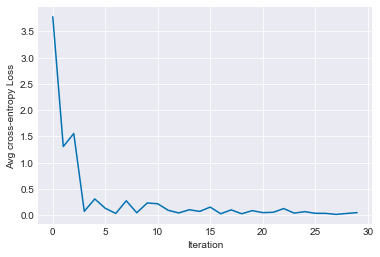

In [20]:
net = MLP(num_features, num_hidden_units, num_classes)
loss, acc_t, acc_v = net.fit(test_x, test_y, test_x, test_y, reg=0, lr=0.001, mini_batch_sz=3, n_epochs=30)

plt.plot(loss)
plt.xlabel('Iteration')
plt.ylabel('Avg cross-entropy Loss')
plt.show()

### c. Test MLP with Circle in Square dataset

First test case where training data = test data.

You should see a nice drop and plateau in loss (after a bunch of print outs).

Starting to train network...There will be 700 epochs and 70000 iterations total, 100 iter/epoch.
Completed epoch 0.0, train_acc: 0.5003, validation_acc: 0.35
  Completed iter 100/70000. Training loss: 0.70.
Completed epoch 1.0, train_acc: 0.5003, validation_acc: 0.35
  Completed iter 200/70000. Training loss: 0.69.
Completed epoch 2.0, train_acc: 0.4113, validation_acc: 0.2
  Completed iter 300/70000. Training loss: 0.69.
Completed epoch 3.0, train_acc: 0.4956, validation_acc: 0.45
  Completed iter 400/70000. Training loss: 0.69.
Completed epoch 4.0, train_acc: 0.5359, validation_acc: 0.5
  Completed iter 500/70000. Training loss: 0.69.
Completed epoch 5.0, train_acc: 0.4916, validation_acc: 0.45
  Completed iter 600/70000. Training loss: 0.69.
Completed epoch 6.0, train_acc: 0.5828, validation_acc: 0.6
  Completed iter 700/70000. Training loss: 0.69.
Completed epoch 7.0, train_acc: 0.6012, validation_acc: 0.65
  Completed iter 800/70000. Training loss: 0.69.
Completed epoch 8.0, train

  Completed iter 7500/70000. Training loss: 0.61.
Completed epoch 75.0, train_acc: 0.7692, validation_acc: 0.8
  Completed iter 7600/70000. Training loss: 0.60.
Completed epoch 76.0, train_acc: 0.7712, validation_acc: 0.8
  Completed iter 7700/70000. Training loss: 0.59.
Completed epoch 77.0, train_acc: 0.7667, validation_acc: 0.8
  Completed iter 7800/70000. Training loss: 0.58.
Completed epoch 78.0, train_acc: 0.783, validation_acc: 0.8
  Completed iter 7900/70000. Training loss: 0.61.
Completed epoch 79.0, train_acc: 0.7773, validation_acc: 0.8
  Completed iter 8000/70000. Training loss: 0.58.
Completed epoch 80.0, train_acc: 0.7715, validation_acc: 0.8
  Completed iter 8100/70000. Training loss: 0.60.
Completed epoch 81.0, train_acc: 0.7924, validation_acc: 0.8
  Completed iter 8200/70000. Training loss: 0.57.
Completed epoch 82.0, train_acc: 0.787, validation_acc: 0.8
  Completed iter 8300/70000. Training loss: 0.58.
Completed epoch 83.0, train_acc: 0.7922, validation_acc: 0.8
  C

  Completed iter 15000/70000. Training loss: 0.33.
Completed epoch 150.0, train_acc: 0.9421, validation_acc: 0.95
  Completed iter 15100/70000. Training loss: 0.32.
Completed epoch 151.0, train_acc: 0.9393, validation_acc: 0.95
  Completed iter 15200/70000. Training loss: 0.31.
Completed epoch 152.0, train_acc: 0.9447, validation_acc: 0.95
  Completed iter 15300/70000. Training loss: 0.33.
Completed epoch 153.0, train_acc: 0.9456, validation_acc: 0.95
  Completed iter 15400/70000. Training loss: 0.30.
Completed epoch 154.0, train_acc: 0.9461, validation_acc: 0.95
  Completed iter 15500/70000. Training loss: 0.30.
Completed epoch 155.0, train_acc: 0.9438, validation_acc: 0.95
  Completed iter 15600/70000. Training loss: 0.32.
Completed epoch 156.0, train_acc: 0.9436, validation_acc: 0.95
  Completed iter 15700/70000. Training loss: 0.29.
Completed epoch 157.0, train_acc: 0.9485, validation_acc: 0.95
  Completed iter 15800/70000. Training loss: 0.32.
Completed epoch 158.0, train_acc: 0.9

  Completed iter 22400/70000. Training loss: 0.20.
Completed epoch 224.0, train_acc: 0.9671, validation_acc: 1.0
  Completed iter 22500/70000. Training loss: 0.19.
Completed epoch 225.0, train_acc: 0.9687, validation_acc: 1.0
  Completed iter 22600/70000. Training loss: 0.20.
Completed epoch 226.0, train_acc: 0.9607, validation_acc: 1.0
  Completed iter 22700/70000. Training loss: 0.21.
Completed epoch 227.0, train_acc: 0.9673, validation_acc: 1.0
  Completed iter 22800/70000. Training loss: 0.21.
Completed epoch 228.0, train_acc: 0.9661, validation_acc: 1.0
  Completed iter 22900/70000. Training loss: 0.17.
Completed epoch 229.0, train_acc: 0.9703, validation_acc: 1.0
  Completed iter 23000/70000. Training loss: 0.20.
Completed epoch 230.0, train_acc: 0.9688, validation_acc: 1.0
  Completed iter 23100/70000. Training loss: 0.19.
Completed epoch 231.0, train_acc: 0.9711, validation_acc: 1.0
  Completed iter 23200/70000. Training loss: 0.21.
Completed epoch 232.0, train_acc: 0.9711, val

  Completed iter 29800/70000. Training loss: 0.18.
Completed epoch 298.0, train_acc: 0.9792, validation_acc: 1.0
  Completed iter 29900/70000. Training loss: 0.14.
Completed epoch 299.0, train_acc: 0.9799, validation_acc: 1.0
  Completed iter 30000/70000. Training loss: 0.18.
Completed epoch 300.0, train_acc: 0.9792, validation_acc: 1.0
  Completed iter 30100/70000. Training loss: 0.14.
Completed epoch 301.0, train_acc: 0.9785, validation_acc: 1.0
  Completed iter 30200/70000. Training loss: 0.17.
Completed epoch 302.0, train_acc: 0.977, validation_acc: 1.0
  Completed iter 30300/70000. Training loss: 0.12.
Completed epoch 303.0, train_acc: 0.9787, validation_acc: 1.0
  Completed iter 30400/70000. Training loss: 0.12.
Completed epoch 304.0, train_acc: 0.9779, validation_acc: 1.0
  Completed iter 30500/70000. Training loss: 0.14.
Completed epoch 305.0, train_acc: 0.9771, validation_acc: 1.0
  Completed iter 30600/70000. Training loss: 0.17.
Completed epoch 306.0, train_acc: 0.9795, vali

  Completed iter 37400/70000. Training loss: 0.10.
Completed epoch 374.0, train_acc: 0.9854, validation_acc: 1.0
  Completed iter 37500/70000. Training loss: 0.12.
Completed epoch 375.0, train_acc: 0.9859, validation_acc: 1.0
  Completed iter 37600/70000. Training loss: 0.11.
Completed epoch 376.0, train_acc: 0.9837, validation_acc: 1.0
  Completed iter 37700/70000. Training loss: 0.11.
Completed epoch 377.0, train_acc: 0.983, validation_acc: 1.0
  Completed iter 37800/70000. Training loss: 0.11.
Completed epoch 378.0, train_acc: 0.9827, validation_acc: 1.0
  Completed iter 37900/70000. Training loss: 0.10.
Completed epoch 379.0, train_acc: 0.9808, validation_acc: 1.0
  Completed iter 38000/70000. Training loss: 0.12.
Completed epoch 380.0, train_acc: 0.9861, validation_acc: 1.0
  Completed iter 38100/70000. Training loss: 0.14.
Completed epoch 381.0, train_acc: 0.9817, validation_acc: 1.0
  Completed iter 38200/70000. Training loss: 0.13.
Completed epoch 382.0, train_acc: 0.9852, vali

  Completed iter 44700/70000. Training loss: 0.11.
Completed epoch 447.0, train_acc: 0.9854, validation_acc: 1.0
  Completed iter 44800/70000. Training loss: 0.08.
Completed epoch 448.0, train_acc: 0.9843, validation_acc: 1.0
  Completed iter 44900/70000. Training loss: 0.13.
Completed epoch 449.0, train_acc: 0.9843, validation_acc: 1.0
  Completed iter 45000/70000. Training loss: 0.14.
Completed epoch 450.0, train_acc: 0.9883, validation_acc: 1.0
  Completed iter 45100/70000. Training loss: 0.11.
Completed epoch 451.0, train_acc: 0.9871, validation_acc: 1.0
  Completed iter 45200/70000. Training loss: 0.14.
Completed epoch 452.0, train_acc: 0.9867, validation_acc: 1.0
  Completed iter 45300/70000. Training loss: 0.11.
Completed epoch 453.0, train_acc: 0.9872, validation_acc: 1.0
  Completed iter 45400/70000. Training loss: 0.10.
Completed epoch 454.0, train_acc: 0.9858, validation_acc: 1.0
  Completed iter 45500/70000. Training loss: 0.10.
Completed epoch 455.0, train_acc: 0.9877, val

  Completed iter 52200/70000. Training loss: 0.11.
Completed epoch 522.0, train_acc: 0.9878, validation_acc: 1.0
  Completed iter 52300/70000. Training loss: 0.13.
Completed epoch 523.0, train_acc: 0.9845, validation_acc: 1.0
  Completed iter 52400/70000. Training loss: 0.08.
Completed epoch 524.0, train_acc: 0.9877, validation_acc: 1.0
  Completed iter 52500/70000. Training loss: 0.12.
Completed epoch 525.0, train_acc: 0.9867, validation_acc: 1.0
  Completed iter 52600/70000. Training loss: 0.10.
Completed epoch 526.0, train_acc: 0.9875, validation_acc: 1.0
  Completed iter 52700/70000. Training loss: 0.09.
Completed epoch 527.0, train_acc: 0.9868, validation_acc: 1.0
  Completed iter 52800/70000. Training loss: 0.08.
Completed epoch 528.0, train_acc: 0.9868, validation_acc: 1.0
  Completed iter 52900/70000. Training loss: 0.12.
Completed epoch 529.0, train_acc: 0.9872, validation_acc: 1.0
  Completed iter 53000/70000. Training loss: 0.08.
Completed epoch 530.0, train_acc: 0.9842, val

  Completed iter 59500/70000. Training loss: 0.09.
Completed epoch 595.0, train_acc: 0.9876, validation_acc: 1.0
  Completed iter 59600/70000. Training loss: 0.07.
Completed epoch 596.0, train_acc: 0.9886, validation_acc: 1.0
  Completed iter 59700/70000. Training loss: 0.08.
Completed epoch 597.0, train_acc: 0.9893, validation_acc: 1.0
  Completed iter 59800/70000. Training loss: 0.09.
Completed epoch 598.0, train_acc: 0.9858, validation_acc: 1.0
  Completed iter 59900/70000. Training loss: 0.10.
Completed epoch 599.0, train_acc: 0.9866, validation_acc: 1.0
  Completed iter 60000/70000. Training loss: 0.06.
Completed epoch 600.0, train_acc: 0.9887, validation_acc: 1.0
  Completed iter 60100/70000. Training loss: 0.08.
Completed epoch 601.0, train_acc: 0.9851, validation_acc: 1.0
  Completed iter 60200/70000. Training loss: 0.08.
Completed epoch 602.0, train_acc: 0.987, validation_acc: 1.0
  Completed iter 60300/70000. Training loss: 0.07.
Completed epoch 603.0, train_acc: 0.9886, vali

  Completed iter 66800/70000. Training loss: 0.06.
Completed epoch 668.0, train_acc: 0.9894, validation_acc: 1.0
  Completed iter 66900/70000. Training loss: 0.10.
Completed epoch 669.0, train_acc: 0.9883, validation_acc: 1.0
  Completed iter 67000/70000. Training loss: 0.09.
Completed epoch 670.0, train_acc: 0.9886, validation_acc: 1.0
  Completed iter 67100/70000. Training loss: 0.07.
Completed epoch 671.0, train_acc: 0.989, validation_acc: 1.0
  Completed iter 67200/70000. Training loss: 0.07.
Completed epoch 672.0, train_acc: 0.9883, validation_acc: 1.0
  Completed iter 67300/70000. Training loss: 0.09.
Completed epoch 673.0, train_acc: 0.9891, validation_acc: 1.0
  Completed iter 67400/70000. Training loss: 0.06.
Completed epoch 674.0, train_acc: 0.989, validation_acc: 1.0
  Completed iter 67500/70000. Training loss: 0.07.
Completed epoch 675.0, train_acc: 0.9862, validation_acc: 1.0
  Completed iter 67600/70000. Training loss: 0.09.
Completed epoch 676.0, train_acc: 0.9887, valid

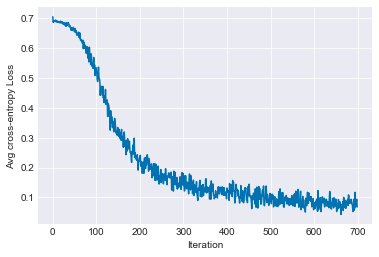

In [21]:
# train = test
hidden_size = 50
net = MLP(cis_train_x.shape[1], hidden_size, 2)
loss, acc_t, acc_v = net.fit(cis_test_x, cis_test_y, cis_val_x, cis_val_y, reg=0, lr=0.01, mini_batch_sz=100, n_epochs=700)

plt.plot(loss)
plt.xlabel('Iteration')
plt.ylabel('Avg cross-entropy Loss')
plt.show()

**TODO**: Run the below cell after training and generate the CIS plot. You should see a well-defined circle inside a square region.

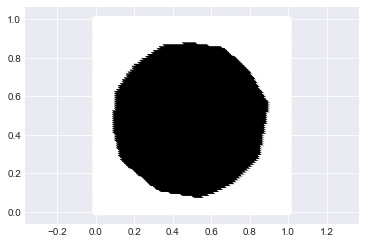

In [22]:
cis_test_y_pred = net.predict(cis_test_x)
plt.scatter(cis_test_x[:,0], cis_test_x[:,1], c=cis_test_y_pred)
plt.axis('equal')
plt.show()

**Second test case where training data != test data:** You should see a jagged polygon approximation to a circle inside a square region. 

Starting to train network...There will be 10000 epochs and 10000 iterations total, 1 iter/epoch.
Completed epoch 0.0, train_acc: 0.5375, validation_acc: 0.35
Completed epoch 1.0, train_acc: 0.5375, validation_acc: 0.35
Completed epoch 2.0, train_acc: 0.5375, validation_acc: 0.35
Completed epoch 3.0, train_acc: 0.5375, validation_acc: 0.35
Completed epoch 4.0, train_acc: 0.5375, validation_acc: 0.35
Completed epoch 5.0, train_acc: 0.5375, validation_acc: 0.35
Completed epoch 6.0, train_acc: 0.5375, validation_acc: 0.35
Completed epoch 7.0, train_acc: 0.5375, validation_acc: 0.35
Completed epoch 8.0, train_acc: 0.5375, validation_acc: 0.35
Completed epoch 9.0, train_acc: 0.5375, validation_acc: 0.35
Completed epoch 10.0, train_acc: 0.5375, validation_acc: 0.35
Completed epoch 11.0, train_acc: 0.5375, validation_acc: 0.35
Completed epoch 12.0, train_acc: 0.5375, validation_acc: 0.35
Completed epoch 13.0, train_acc: 0.5375, validation_acc: 0.35
Completed epoch 14.0, train_acc: 0.5375, vali

Completed epoch 268.0, train_acc: 0.475, validation_acc: 0.3
Completed epoch 269.0, train_acc: 0.475, validation_acc: 0.25
Completed epoch 270.0, train_acc: 0.475, validation_acc: 0.25
Completed epoch 271.0, train_acc: 0.475, validation_acc: 0.45
Completed epoch 272.0, train_acc: 0.475, validation_acc: 0.45
Completed epoch 273.0, train_acc: 0.4125, validation_acc: 0.3
Completed epoch 274.0, train_acc: 0.425, validation_acc: 0.35
Completed epoch 275.0, train_acc: 0.4625, validation_acc: 0.45
Completed epoch 276.0, train_acc: 0.475, validation_acc: 0.45
Completed epoch 277.0, train_acc: 0.425, validation_acc: 0.35
Completed epoch 278.0, train_acc: 0.4875, validation_acc: 0.25
Completed epoch 279.0, train_acc: 0.425, validation_acc: 0.35
Completed epoch 280.0, train_acc: 0.4625, validation_acc: 0.25
Completed epoch 281.0, train_acc: 0.5, validation_acc: 0.25
Completed epoch 282.0, train_acc: 0.425, validation_acc: 0.35
Completed epoch 283.0, train_acc: 0.4375, validation_acc: 0.4
Complete

Completed epoch 519.0, train_acc: 0.575, validation_acc: 0.55
Completed epoch 520.0, train_acc: 0.575, validation_acc: 0.55
Completed epoch 521.0, train_acc: 0.5875, validation_acc: 0.55
Completed epoch 522.0, train_acc: 0.5875, validation_acc: 0.55
Completed epoch 523.0, train_acc: 0.5875, validation_acc: 0.55
Completed epoch 524.0, train_acc: 0.5875, validation_acc: 0.55
Completed epoch 525.0, train_acc: 0.575, validation_acc: 0.55
Completed epoch 526.0, train_acc: 0.5625, validation_acc: 0.55
Completed epoch 527.0, train_acc: 0.5125, validation_acc: 0.55
Completed epoch 528.0, train_acc: 0.5125, validation_acc: 0.55
Completed epoch 529.0, train_acc: 0.5875, validation_acc: 0.55
Completed epoch 530.0, train_acc: 0.5875, validation_acc: 0.55
Completed epoch 531.0, train_acc: 0.5875, validation_acc: 0.55
Completed epoch 532.0, train_acc: 0.575, validation_acc: 0.6
Completed epoch 533.0, train_acc: 0.575, validation_acc: 0.55
Completed epoch 534.0, train_acc: 0.5875, validation_acc: 0.5

Completed epoch 802.0, train_acc: 0.7125, validation_acc: 0.55
Completed epoch 803.0, train_acc: 0.725, validation_acc: 0.6
Completed epoch 804.0, train_acc: 0.725, validation_acc: 0.6
Completed epoch 805.0, train_acc: 0.7, validation_acc: 0.55
Completed epoch 806.0, train_acc: 0.725, validation_acc: 0.55
Completed epoch 807.0, train_acc: 0.725, validation_acc: 0.6
Completed epoch 808.0, train_acc: 0.7375, validation_acc: 0.6
Completed epoch 809.0, train_acc: 0.75, validation_acc: 0.6
Completed epoch 810.0, train_acc: 0.7625, validation_acc: 0.6
Completed epoch 811.0, train_acc: 0.75, validation_acc: 0.6
Completed epoch 812.0, train_acc: 0.725, validation_acc: 0.6
Completed epoch 813.0, train_acc: 0.775, validation_acc: 0.6
Completed epoch 814.0, train_acc: 0.7875, validation_acc: 0.6
Completed epoch 815.0, train_acc: 0.7875, validation_acc: 0.6
Completed epoch 816.0, train_acc: 0.7875, validation_acc: 0.6
Completed epoch 817.0, train_acc: 0.775, validation_acc: 0.6
Completed epoch 818

Completed epoch 1102.0, train_acc: 0.825, validation_acc: 0.55
Completed epoch 1103.0, train_acc: 0.7875, validation_acc: 0.55
Completed epoch 1104.0, train_acc: 0.825, validation_acc: 0.6
Completed epoch 1105.0, train_acc: 0.8, validation_acc: 0.6
Completed epoch 1106.0, train_acc: 0.775, validation_acc: 0.55
Completed epoch 1107.0, train_acc: 0.8, validation_acc: 0.55
Completed epoch 1108.0, train_acc: 0.8, validation_acc: 0.6
Completed epoch 1109.0, train_acc: 0.825, validation_acc: 0.6
Completed epoch 1110.0, train_acc: 0.825, validation_acc: 0.6
Completed epoch 1111.0, train_acc: 0.825, validation_acc: 0.6
Completed epoch 1112.0, train_acc: 0.8375, validation_acc: 0.6
Completed epoch 1113.0, train_acc: 0.825, validation_acc: 0.6
Completed epoch 1114.0, train_acc: 0.825, validation_acc: 0.6
Completed epoch 1115.0, train_acc: 0.8375, validation_acc: 0.6
Completed epoch 1116.0, train_acc: 0.8125, validation_acc: 0.6
Completed epoch 1117.0, train_acc: 0.825, validation_acc: 0.6
Comple

Completed epoch 1438.0, train_acc: 0.825, validation_acc: 0.65
Completed epoch 1439.0, train_acc: 0.825, validation_acc: 0.65
Completed epoch 1440.0, train_acc: 0.85, validation_acc: 0.65
Completed epoch 1441.0, train_acc: 0.825, validation_acc: 0.65
Completed epoch 1442.0, train_acc: 0.825, validation_acc: 0.65
Completed epoch 1443.0, train_acc: 0.825, validation_acc: 0.7
Completed epoch 1444.0, train_acc: 0.825, validation_acc: 0.7
Completed epoch 1445.0, train_acc: 0.825, validation_acc: 0.7
Completed epoch 1446.0, train_acc: 0.825, validation_acc: 0.65
Completed epoch 1447.0, train_acc: 0.825, validation_acc: 0.65
Completed epoch 1448.0, train_acc: 0.825, validation_acc: 0.7
Completed epoch 1449.0, train_acc: 0.825, validation_acc: 0.65
Completed epoch 1450.0, train_acc: 0.825, validation_acc: 0.7
Completed epoch 1451.0, train_acc: 0.825, validation_acc: 0.65
Completed epoch 1452.0, train_acc: 0.825, validation_acc: 0.65
Completed epoch 1453.0, train_acc: 0.8375, validation_acc: 0.

Completed epoch 1680.0, train_acc: 0.8625, validation_acc: 0.75
Completed epoch 1681.0, train_acc: 0.875, validation_acc: 0.75
Completed epoch 1682.0, train_acc: 0.875, validation_acc: 0.75
Completed epoch 1683.0, train_acc: 0.8875, validation_acc: 0.75
Completed epoch 1684.0, train_acc: 0.8625, validation_acc: 0.75
Completed epoch 1685.0, train_acc: 0.8625, validation_acc: 0.75
Completed epoch 1686.0, train_acc: 0.8625, validation_acc: 0.75
Completed epoch 1687.0, train_acc: 0.8625, validation_acc: 0.75
Completed epoch 1688.0, train_acc: 0.8875, validation_acc: 0.75
Completed epoch 1689.0, train_acc: 0.875, validation_acc: 0.75
Completed epoch 1690.0, train_acc: 0.8875, validation_acc: 0.75
Completed epoch 1691.0, train_acc: 0.875, validation_acc: 0.75
Completed epoch 1692.0, train_acc: 0.9, validation_acc: 0.85
Completed epoch 1693.0, train_acc: 0.8875, validation_acc: 0.75
Completed epoch 1694.0, train_acc: 0.8875, validation_acc: 0.75
Completed epoch 1695.0, train_acc: 0.8625, vali

Completed epoch 1940.0, train_acc: 0.9375, validation_acc: 0.85
Completed epoch 1941.0, train_acc: 0.9375, validation_acc: 0.85
Completed epoch 1942.0, train_acc: 0.9375, validation_acc: 0.85
Completed epoch 1943.0, train_acc: 0.9375, validation_acc: 0.85
Completed epoch 1944.0, train_acc: 0.9375, validation_acc: 0.9
Completed epoch 1945.0, train_acc: 0.95, validation_acc: 0.9
Completed epoch 1946.0, train_acc: 0.9375, validation_acc: 0.85
Completed epoch 1947.0, train_acc: 0.95, validation_acc: 0.85
Completed epoch 1948.0, train_acc: 0.95, validation_acc: 0.85
Completed epoch 1949.0, train_acc: 0.95, validation_acc: 0.85
Completed epoch 1950.0, train_acc: 0.925, validation_acc: 0.85
Completed epoch 1951.0, train_acc: 0.9625, validation_acc: 1.0
Completed epoch 1952.0, train_acc: 0.9375, validation_acc: 0.85
Completed epoch 1953.0, train_acc: 0.9375, validation_acc: 0.85
Completed epoch 1954.0, train_acc: 0.9625, validation_acc: 0.85
Completed epoch 1955.0, train_acc: 0.9375, validatio

Completed epoch 2219.0, train_acc: 0.9875, validation_acc: 0.95
Completed epoch 2220.0, train_acc: 0.9875, validation_acc: 0.85
Completed epoch 2221.0, train_acc: 0.9875, validation_acc: 0.95
Completed epoch 2222.0, train_acc: 0.975, validation_acc: 0.9
Completed epoch 2223.0, train_acc: 0.975, validation_acc: 0.85
Completed epoch 2224.0, train_acc: 0.9875, validation_acc: 0.85
Completed epoch 2225.0, train_acc: 0.975, validation_acc: 0.85
Completed epoch 2226.0, train_acc: 0.975, validation_acc: 0.9
Completed epoch 2227.0, train_acc: 0.9625, validation_acc: 0.9
Completed epoch 2228.0, train_acc: 0.9625, validation_acc: 0.85
Completed epoch 2229.0, train_acc: 0.975, validation_acc: 0.85
Completed epoch 2230.0, train_acc: 0.9625, validation_acc: 0.8
Completed epoch 2231.0, train_acc: 0.9875, validation_acc: 0.85
Completed epoch 2232.0, train_acc: 0.9875, validation_acc: 0.95
Completed epoch 2233.0, train_acc: 0.9875, validation_acc: 0.9
Completed epoch 2234.0, train_acc: 0.9625, validat

Completed epoch 2457.0, train_acc: 0.9875, validation_acc: 0.9
Completed epoch 2458.0, train_acc: 0.9875, validation_acc: 0.95
Completed epoch 2459.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 2460.0, train_acc: 0.9875, validation_acc: 0.95
Completed epoch 2461.0, train_acc: 0.9875, validation_acc: 0.95
Completed epoch 2462.0, train_acc: 0.9875, validation_acc: 0.85
Completed epoch 2463.0, train_acc: 0.9875, validation_acc: 0.9
Completed epoch 2464.0, train_acc: 0.9875, validation_acc: 0.9
Completed epoch 2465.0, train_acc: 0.9875, validation_acc: 0.9
Completed epoch 2466.0, train_acc: 0.9875, validation_acc: 0.85
Completed epoch 2467.0, train_acc: 0.9875, validation_acc: 0.85
Completed epoch 2468.0, train_acc: 0.9875, validation_acc: 0.9
Completed epoch 2469.0, train_acc: 0.9875, validation_acc: 0.9
Completed epoch 2470.0, train_acc: 0.9875, validation_acc: 0.9
Completed epoch 2471.0, train_acc: 0.9875, validation_acc: 0.9
Completed epoch 2472.0, train_acc: 0.9875, validati

Completed epoch 2727.0, train_acc: 0.9875, validation_acc: 0.9
Completed epoch 2728.0, train_acc: 0.9875, validation_acc: 0.9
Completed epoch 2729.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 2730.0, train_acc: 0.9875, validation_acc: 0.95
Completed epoch 2731.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 2732.0, train_acc: 0.9875, validation_acc: 0.9
Completed epoch 2733.0, train_acc: 0.9875, validation_acc: 0.85
Completed epoch 2734.0, train_acc: 0.9875, validation_acc: 0.95
Completed epoch 2735.0, train_acc: 0.9875, validation_acc: 0.9
Completed epoch 2736.0, train_acc: 0.9875, validation_acc: 0.9
Completed epoch 2737.0, train_acc: 0.9875, validation_acc: 0.9
Completed epoch 2738.0, train_acc: 0.9875, validation_acc: 0.9
Completed epoch 2739.0, train_acc: 0.9875, validation_acc: 0.85
Completed epoch 2740.0, train_acc: 0.9875, validation_acc: 0.95
Completed epoch 2741.0, train_acc: 0.9875, validation_acc: 0.9
Completed epoch 2742.0, train_acc: 0.9875, validation_

Completed epoch 2989.0, train_acc: 0.9875, validation_acc: 0.85
Completed epoch 2990.0, train_acc: 0.9875, validation_acc: 0.95
Completed epoch 2991.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 2992.0, train_acc: 0.9875, validation_acc: 0.95
Completed epoch 2993.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 2994.0, train_acc: 0.9875, validation_acc: 0.95
Completed epoch 2995.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 2996.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 2997.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 2998.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 2999.0, train_acc: 0.9875, validation_acc: 0.9
  Completed iter 3000/10000. Training loss: 0.10.
Completed epoch 3000.0, train_acc: 0.9875, validation_acc: 0.95
Completed epoch 3001.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 3002.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 3003.0, train_acc: 0.9875, validation_acc: 0.95
Completed epoch

Completed epoch 3263.0, train_acc: 0.9875, validation_acc: 0.9
Completed epoch 3264.0, train_acc: 0.9875, validation_acc: 0.9
Completed epoch 3265.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 3266.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 3267.0, train_acc: 0.9875, validation_acc: 0.9
Completed epoch 3268.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 3269.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 3270.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 3271.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 3272.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 3273.0, train_acc: 0.9875, validation_acc: 0.9
Completed epoch 3274.0, train_acc: 0.9875, validation_acc: 0.9
Completed epoch 3275.0, train_acc: 0.9875, validation_acc: 0.95
Completed epoch 3276.0, train_acc: 0.9875, validation_acc: 0.9
Completed epoch 3277.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 3278.0, train_acc: 0.9875, validation_acc: 0.9
Complet

Completed epoch 3496.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 3497.0, train_acc: 0.9875, validation_acc: 0.9
Completed epoch 3498.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 3499.0, train_acc: 1.0, validation_acc: 0.95
  Completed iter 3500/10000. Training loss: 0.09.
Completed epoch 3500.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 3501.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 3502.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 3503.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 3504.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 3505.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 3506.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 3507.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 3508.0, train_acc: 0.9875, validation_acc: 0.9
Completed epoch 3509.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 3510.0, train_acc: 0.9875, validation_acc: 0.95
Completed epoch 3511.0, train_

Completed epoch 3697.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 3698.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 3699.0, train_acc: 0.9875, validation_acc: 0.95
  Completed iter 3700/10000. Training loss: 0.07.
Completed epoch 3700.0, train_acc: 0.9875, validation_acc: 0.9
Completed epoch 3701.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 3702.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 3703.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 3704.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 3705.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 3706.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 3707.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 3708.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 3709.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 3710.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 3711.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 3712.0, train_acc: 1.

Completed epoch 3877.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 3878.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 3879.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 3880.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 3881.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 3882.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 3883.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 3884.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 3885.0, train_acc: 0.9875, validation_acc: 0.9
Completed epoch 3886.0, train_acc: 0.9875, validation_acc: 0.9
Completed epoch 3887.0, train_acc: 0.9875, validation_acc: 0.9
Completed epoch 3888.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 3889.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 3890.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 3891.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 3892.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 3893.0, trai

Completed epoch 4068.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 4069.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 4070.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 4071.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 4072.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 4073.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 4074.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 4075.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 4076.0, train_acc: 0.9875, validation_acc: 0.9
Completed epoch 4077.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 4078.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 4079.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 4080.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 4081.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 4082.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 4083.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 4084.0, tra

Completed epoch 4264.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 4265.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 4266.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 4267.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 4268.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 4269.0, train_acc: 0.9875, validation_acc: 0.9
Completed epoch 4270.0, train_acc: 0.9875, validation_acc: 0.9
Completed epoch 4271.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 4272.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 4273.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 4274.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 4275.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 4276.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 4277.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 4278.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 4279.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 4280.0, t

Completed epoch 4469.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 4470.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 4471.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 4472.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 4473.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 4474.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 4475.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 4476.0, train_acc: 0.9875, validation_acc: 0.95
Completed epoch 4477.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 4478.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 4479.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 4480.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 4481.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 4482.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 4483.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 4484.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 4485.0

Completed epoch 4662.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 4663.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 4664.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 4665.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 4666.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 4667.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 4668.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 4669.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 4670.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 4671.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 4672.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 4673.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 4674.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 4675.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 4676.0, train_acc: 0.9875, validation_acc: 0.9
Completed epoch 4677.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 4678.0, trai

Completed epoch 4840.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 4841.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 4842.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 4843.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 4844.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 4845.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 4846.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 4847.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 4848.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 4849.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 4850.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 4851.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 4852.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 4853.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 4854.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 4855.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 4856.0, train_acc: 1.0, 

Completed epoch 5014.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 5015.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 5016.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 5017.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 5018.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 5019.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 5020.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 5021.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 5022.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 5023.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 5024.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 5025.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 5026.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 5027.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 5028.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 5029.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 5030.0, train_a

Completed epoch 5216.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 5217.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 5218.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 5219.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 5220.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 5221.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 5222.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 5223.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 5224.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 5225.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 5226.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 5227.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 5228.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 5229.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 5230.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 5231.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 5232.0, train_ac

Completed epoch 5388.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 5389.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 5390.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 5391.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 5392.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 5393.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 5394.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 5395.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 5396.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 5397.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 5398.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 5399.0, train_acc: 1.0, validation_acc: 0.9
  Completed iter 5400/10000. Training loss: 0.03.
Completed epoch 5400.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 5401.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 5402.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 5403.0, train_acc: 1.0, valida

Completed epoch 5572.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 5573.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 5574.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 5575.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 5576.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 5577.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 5578.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 5579.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 5580.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 5581.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 5582.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 5583.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 5584.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 5585.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 5586.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 5587.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 5588.0, train_

Completed epoch 5770.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 5771.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 5772.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 5773.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 5774.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 5775.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 5776.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 5777.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 5778.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 5779.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 5780.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 5781.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 5782.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 5783.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 5784.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 5785.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 5786.0, tra

Completed epoch 5978.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 5979.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 5980.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 5981.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 5982.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 5983.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 5984.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 5985.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 5986.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 5987.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 5988.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 5989.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 5990.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 5991.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 5992.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 5993.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 5994.0, train_acc: 

Completed epoch 6165.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 6166.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 6167.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 6168.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 6169.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 6170.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 6171.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 6172.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 6173.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 6174.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 6175.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 6176.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 6177.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 6178.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 6179.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 6180.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 6181.0, train_ac

Completed epoch 6367.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 6368.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 6369.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 6370.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 6371.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 6372.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 6373.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 6374.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 6375.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 6376.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 6377.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 6378.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 6379.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 6380.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 6381.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 6382.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 6383.0, train_ac

Completed epoch 6570.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 6571.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 6572.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 6573.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 6574.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 6575.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 6576.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 6577.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 6578.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 6579.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 6580.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 6581.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 6582.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 6583.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 6584.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 6585.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 6586.0, 

Completed epoch 6749.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 6750.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 6751.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 6752.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 6753.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 6754.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 6755.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 6756.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 6757.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 6758.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 6759.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 6760.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 6761.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 6762.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 6763.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 6764.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 6765.0, train_acc: 

Completed epoch 6937.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 6938.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 6939.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 6940.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 6941.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 6942.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 6943.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 6944.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 6945.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 6946.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 6947.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 6948.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 6949.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 6950.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 6951.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 6952.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 6953.0, train_ac

Completed epoch 7130.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 7131.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 7132.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 7133.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 7134.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 7135.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 7136.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 7137.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 7138.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 7139.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 7140.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 7141.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 7142.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 7143.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 7144.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 7145.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 7146.0, train

Completed epoch 7334.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 7335.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 7336.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 7337.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 7338.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 7339.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 7340.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 7341.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 7342.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 7343.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 7344.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 7345.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 7346.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 7347.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 7348.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 7349.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 7350.0, tr

Completed epoch 7527.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 7528.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 7529.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 7530.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 7531.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 7532.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 7533.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 7534.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 7535.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 7536.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 7537.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 7538.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 7539.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 7540.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 7541.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 7542.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 7543.0, train_ac

Completed epoch 7708.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 7709.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 7710.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 7711.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 7712.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 7713.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 7714.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 7715.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 7716.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 7717.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 7718.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 7719.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 7720.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 7721.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 7722.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 7723.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 7724.0, train_acc: 1

Completed epoch 7901.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 7902.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 7903.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 7904.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 7905.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 7906.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 7907.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 7908.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 7909.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 7910.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 7911.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 7912.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 7913.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 7914.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 7915.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 7916.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 7917.0, train_acc: 1.0,

Completed epoch 8099.0, train_acc: 1.0, validation_acc: 0.9
  Completed iter 8100/10000. Training loss: 0.03.
Completed epoch 8100.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 8101.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 8102.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 8103.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 8104.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 8105.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 8106.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 8107.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 8108.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 8109.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 8110.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 8111.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 8112.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 8113.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 8114.0, train_acc: 1.0, va

Completed epoch 8283.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 8284.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 8285.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 8286.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 8287.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 8288.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 8289.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 8290.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 8291.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 8292.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 8293.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 8294.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 8295.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 8296.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 8297.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 8298.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 8299.0, train_a

Completed epoch 8452.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 8453.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 8454.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 8455.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 8456.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 8457.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 8458.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 8459.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 8460.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 8461.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 8462.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 8463.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 8464.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 8465.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 8466.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 8467.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 8468.0, train_acc: 1.0

Completed epoch 8642.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 8643.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 8644.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 8645.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 8646.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 8647.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 8648.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 8649.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 8650.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 8651.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 8652.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 8653.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 8654.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 8655.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 8656.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 8657.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 8658.0, train_acc: 

Completed epoch 8846.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 8847.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 8848.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 8849.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 8850.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 8851.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 8852.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 8853.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 8854.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 8855.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 8856.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 8857.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 8858.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 8859.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 8860.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 8861.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 8862.0, tra

Completed epoch 9029.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 9030.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 9031.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 9032.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 9033.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 9034.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 9035.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 9036.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 9037.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 9038.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 9039.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 9040.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 9041.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 9042.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 9043.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 9044.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 9045.0, tra

Completed epoch 9216.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 9217.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 9218.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 9219.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 9220.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 9221.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 9222.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 9223.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 9224.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 9225.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 9226.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 9227.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 9228.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 9229.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 9230.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 9231.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 9232.0, train_acc: 1.0

Completed epoch 9377.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 9378.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 9379.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 9380.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 9381.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 9382.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 9383.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 9384.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 9385.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 9386.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 9387.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 9388.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 9389.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 9390.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 9391.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 9392.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 9393.0, train_acc: 1

Completed epoch 9609.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 9610.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 9611.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 9612.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 9613.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 9614.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 9615.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 9616.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 9617.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 9618.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 9619.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 9620.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 9621.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 9622.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 9623.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 9624.0, train_acc: 1.0, validation_acc: 0.95
Completed epoch 9625.0, train

Completed epoch 9861.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 9862.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 9863.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 9864.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 9865.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 9866.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 9867.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 9868.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 9869.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 9870.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 9871.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 9872.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 9873.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 9874.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 9875.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 9876.0, train_acc: 1.0, validation_acc: 0.9
Completed epoch 9877.0, train_acc: 1.0, 

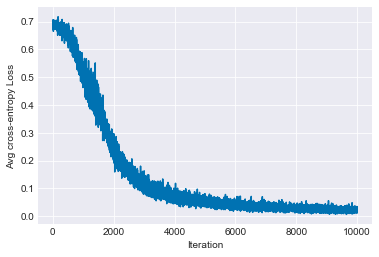

In [25]:
# train != test
net = MLP(cis_train_x.shape[1], hidden_size, 2)
loss, acc_t, acc_v = net.fit(cis_train_x, cis_train_y, cis_val_x, cis_val_y, reg=0, lr=0.1, mini_batch_sz=len(cis_train_x), n_epochs=10000)

plt.plot(loss)
plt.xlabel('Iteration')
plt.ylabel('Avg cross-entropy Loss')
plt.show()

**TODO**: Run the below cell after training and generate the CIS plot.

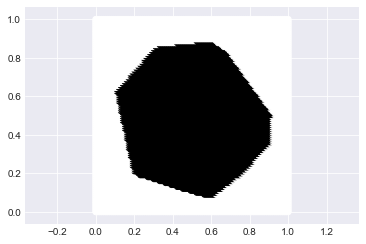

In [26]:
cis_test_y_pred = net.predict(cis_test_x)
plt.scatter(cis_test_x[:,0], cis_test_x[:,1], c=cis_test_y_pred)
plt.axis('equal')
plt.show()

**Question 5**: How do you interpret the circle-in-square results? Do you think the single-layer net (with softmax) can handle the CIS dataset? Why or why not? (You're invited to try it, maybe as an extension :)

The CIS data is one class value for points within a central circle and another class for points outside.
Since single layer networks would only be able to draw linear boundaries between two classes, it would not be able to classify the cis data.

**Question 6**: Play with # hidden units, epochs, regularization strength on CIS training...how does each parameter affect the results?

\# hidden units and epochs make the model better defined
Regularization makes the circle more jagged

### d. Train on STL-10 dataset, plot performance

Try training the MLP on the below set of hyperparameters

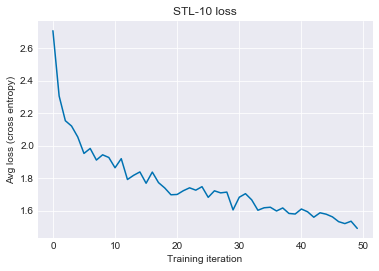

In [28]:
net = MLP(x_train.shape[1], 100, 10)
loss, acc_t, acc_v = net.fit(x_train, y_train, x_val, y_val,
                             lr=0.05, reg=0.01, mini_batch_sz=500, n_epochs=50, verbose=0)
plt.plot(loss)
plt.xlabel('Training iteration')
plt.ylabel('Avg loss (cross entropy)')
plt.title('STL-10 loss')
plt.show()

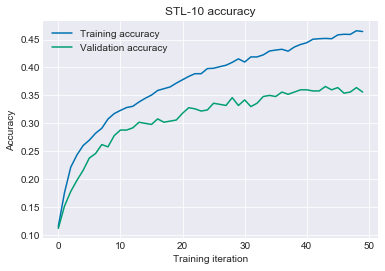

In [29]:
plt.plot(acc_t, label='Training accuracy')
plt.plot(acc_v, label='Validation accuracy')
plt.xlabel('Training iteration')
plt.ylabel('Accuracy')
plt.title('STL-10 accuracy')
plt.legend()
plt.show()

**Question 7**: What do the above loss and training and validation accuracy curves suggest about the quality of the hyperparameters used during training?

Since the distance between our validation and train starts to increase, we see that our model is starting to overfit. However, training accuracy is still increasing slightly. We could stand to increase it further by training for more epochs, while possibly avoiding overfitting by increasing regularization.

### e. Optimize on STL-10 dataset, plot performance

**TODO** Write code in the cell below to perform a grid search to find the combinations of

- learning rate
- regularization strength
- number hidden units
- mini-batch size

that yields the highest STL-10 validation set accuracy.

You should be able to achieve higher accuracy than in the single layer version of the softmax network.

In [69]:
np.random.seed(0)

#Store the best values
best_val_acc = 0
best_lr = 0
best_reg = 0
best_hidden = 0
best_mini_batch_sz = 0

#Set the initial values for the hyperparams
init_lr = 0.0501
init_reg = 50
init_hidden = 30
init_mini_batch_sz = 210

#Set the values for the intervals at we'll search across, for each hyperparam
#These will be halved every time the search gets finer
lr_interval = 0.005
reg_interval = 5
hidden_interval = 2
mini_batch_sz_interval = 19

#Search hyperparameters
sampling_step_size = 5
num_zooms = 3

#Implement coarse-to-fine search for each hyperparameter
#An outer for loop in which we adjust the intervals and initial values for each search
#An inner quadruple-for-loop in which we search using the given intervals and inital values

for i in range(num_zooms):
    
    best_acc = 0
    
    #Search across learning rate
    for j in range(-10,11,sampling_step_size):
        lr = max(0.001,init_lr+(lr_interval*j))
        lr = min(0.1,lr)
        
        #Search across batch_size
        for k in range(-10,11,sampling_step_size):
            batch = max(20,int(init_mini_batch_sz+(mini_batch_sz_interval*k)))
            batch = min(400, batch)
            
            #Search across reg val
            for l in range(-10,11,sampling_step_size):
                reg = max(0,init_reg+(reg_interval*l))
                reg = min(100,reg)
                
                #Search across num_hidden layers
                for m in range (-10,11,sampling_step_size):
                    num_hidden = max(10,int(init_hidden+(hidden_interval*m)))
                    num_hidden = min(100,num_hidden)
                           
                    #Train 
                    net = MLP(x_train.shape[1], num_hidden, 10)
                    loss, train_acc, val_acc = net.fit(x_train, y_train, x_val, y_val,
                                 lr=lr, reg=reg, mini_batch_sz=batch, n_epochs=10, verbose=0)

                    print(f"Z-Lvl: {i+1}\tLr: {lr:3f}\tReg: {reg:2f}\tBtch: {batch}\tHdn:  {num_hidden}\tAcc: {val_acc[-1]:3f}")

                    #Update best if needed
                    if val_acc[-1] > best_acc:                    
                        best_acc = val_acc[-1]
                        best_lr = lr
                        best_reg = reg
                        best_hidden = num_hidden
                        best_mini_batch_sz = batch

    init_lr = best_lr
    lr_interval = lr_interval/2
    init_reg = best_reg
    reg_interval = reg_interval/2
    init_mini_batch_sz = best_mini_batch_sz
    mini_batch_sz_interval = mini_batch_sz_interval/2

print(f"The best learning rate was {best_lr}")
print(f"The best batch-size was {best_batch}")
print(f"The best regularization value was {best_reg}")
print(f"The best number of hidden neurons was {best_hidden}")

Z-Lvl: 1	Lr: 0.001000	Reg: 0.000000	Btch: 20	Hdn:  10	Acc: 0.154000
Z-Lvl: 1	Lr: 0.001000	Reg: 0.000000	Btch: 20	Hdn:  20	Acc: 0.190000
Z-Lvl: 1	Lr: 0.001000	Reg: 0.000000	Btch: 20	Hdn:  30	Acc: 0.208000
Z-Lvl: 1	Lr: 0.001000	Reg: 0.000000	Btch: 20	Hdn:  40	Acc: 0.208000
Z-Lvl: 1	Lr: 0.001000	Reg: 0.000000	Btch: 20	Hdn:  50	Acc: 0.168000
Z-Lvl: 1	Lr: 0.001000	Reg: 25.000000	Btch: 20	Hdn:  10	Acc: 0.154000
Z-Lvl: 1	Lr: 0.001000	Reg: 25.000000	Btch: 20	Hdn:  20	Acc: 0.190000
Z-Lvl: 1	Lr: 0.001000	Reg: 25.000000	Btch: 20	Hdn:  30	Acc: 0.208000
Z-Lvl: 1	Lr: 0.001000	Reg: 25.000000	Btch: 20	Hdn:  40	Acc: 0.208000
Z-Lvl: 1	Lr: 0.001000	Reg: 25.000000	Btch: 20	Hdn:  50	Acc: 0.168000
Z-Lvl: 1	Lr: 0.001000	Reg: 50.000000	Btch: 20	Hdn:  10	Acc: 0.154000
Z-Lvl: 1	Lr: 0.001000	Reg: 50.000000	Btch: 20	Hdn:  20	Acc: 0.190000
Z-Lvl: 1	Lr: 0.001000	Reg: 50.000000	Btch: 20	Hdn:  30	Acc: 0.208000
Z-Lvl: 1	Lr: 0.001000	Reg: 50.000000	Btch: 20	Hdn:  40	Acc: 0.208000
Z-Lvl: 1	Lr: 0.001000	Reg: 50.000000	Bt

Z-Lvl: 1	Lr: 0.001000	Reg: 75.000000	Btch: 400	Hdn:  40	Acc: 0.114000
Z-Lvl: 1	Lr: 0.001000	Reg: 75.000000	Btch: 400	Hdn:  50	Acc: 0.090000
Z-Lvl: 1	Lr: 0.001000	Reg: 100.000000	Btch: 400	Hdn:  10	Acc: 0.130000
Z-Lvl: 1	Lr: 0.001000	Reg: 100.000000	Btch: 400	Hdn:  20	Acc: 0.132000
Z-Lvl: 1	Lr: 0.001000	Reg: 100.000000	Btch: 400	Hdn:  30	Acc: 0.100000
Z-Lvl: 1	Lr: 0.001000	Reg: 100.000000	Btch: 400	Hdn:  40	Acc: 0.114000
Z-Lvl: 1	Lr: 0.001000	Reg: 100.000000	Btch: 400	Hdn:  50	Acc: 0.090000
Z-Lvl: 1	Lr: 0.025100	Reg: 0.000000	Btch: 20	Hdn:  10	Acc: 0.364000
Z-Lvl: 1	Lr: 0.025100	Reg: 0.000000	Btch: 20	Hdn:  20	Acc: 0.378000
Z-Lvl: 1	Lr: 0.025100	Reg: 0.000000	Btch: 20	Hdn:  30	Acc: 0.368000
Z-Lvl: 1	Lr: 0.025100	Reg: 0.000000	Btch: 20	Hdn:  40	Acc: 0.400000
Z-Lvl: 1	Lr: 0.025100	Reg: 0.000000	Btch: 20	Hdn:  50	Acc: 0.416000
Z-Lvl: 1	Lr: 0.025100	Reg: 25.000000	Btch: 20	Hdn:  10	Acc: 0.364000
Z-Lvl: 1	Lr: 0.025100	Reg: 25.000000	Btch: 20	Hdn:  20	Acc: 0.378000
Z-Lvl: 1	Lr: 0.025100	Reg: 

Z-Lvl: 1	Lr: 0.025100	Reg: 50.000000	Btch: 400	Hdn:  20	Acc: 0.222000
Z-Lvl: 1	Lr: 0.025100	Reg: 50.000000	Btch: 400	Hdn:  30	Acc: 0.226000
Z-Lvl: 1	Lr: 0.025100	Reg: 50.000000	Btch: 400	Hdn:  40	Acc: 0.208000
Z-Lvl: 1	Lr: 0.025100	Reg: 50.000000	Btch: 400	Hdn:  50	Acc: 0.174000
Z-Lvl: 1	Lr: 0.025100	Reg: 75.000000	Btch: 400	Hdn:  10	Acc: 0.152000
Z-Lvl: 1	Lr: 0.025100	Reg: 75.000000	Btch: 400	Hdn:  20	Acc: 0.222000
Z-Lvl: 1	Lr: 0.025100	Reg: 75.000000	Btch: 400	Hdn:  30	Acc: 0.226000
Z-Lvl: 1	Lr: 0.025100	Reg: 75.000000	Btch: 400	Hdn:  40	Acc: 0.208000
Z-Lvl: 1	Lr: 0.025100	Reg: 75.000000	Btch: 400	Hdn:  50	Acc: 0.174000
Z-Lvl: 1	Lr: 0.025100	Reg: 100.000000	Btch: 400	Hdn:  10	Acc: 0.152000
Z-Lvl: 1	Lr: 0.025100	Reg: 100.000000	Btch: 400	Hdn:  20	Acc: 0.222000
Z-Lvl: 1	Lr: 0.025100	Reg: 100.000000	Btch: 400	Hdn:  30	Acc: 0.226000
Z-Lvl: 1	Lr: 0.025100	Reg: 100.000000	Btch: 400	Hdn:  40	Acc: 0.208000
Z-Lvl: 1	Lr: 0.025100	Reg: 100.000000	Btch: 400	Hdn:  50	Acc: 0.174000
Z-Lvl: 1	Lr: 0.

Z-Lvl: 1	Lr: 0.050100	Reg: 0.000000	Btch: 400	Hdn:  50	Acc: 0.228000
Z-Lvl: 1	Lr: 0.050100	Reg: 25.000000	Btch: 400	Hdn:  10	Acc: 0.198000
Z-Lvl: 1	Lr: 0.050100	Reg: 25.000000	Btch: 400	Hdn:  20	Acc: 0.232000
Z-Lvl: 1	Lr: 0.050100	Reg: 25.000000	Btch: 400	Hdn:  30	Acc: 0.236000
Z-Lvl: 1	Lr: 0.050100	Reg: 25.000000	Btch: 400	Hdn:  40	Acc: 0.220000
Z-Lvl: 1	Lr: 0.050100	Reg: 25.000000	Btch: 400	Hdn:  50	Acc: 0.228000
Z-Lvl: 1	Lr: 0.050100	Reg: 50.000000	Btch: 400	Hdn:  10	Acc: 0.198000
Z-Lvl: 1	Lr: 0.050100	Reg: 50.000000	Btch: 400	Hdn:  20	Acc: 0.232000
Z-Lvl: 1	Lr: 0.050100	Reg: 50.000000	Btch: 400	Hdn:  30	Acc: 0.236000
Z-Lvl: 1	Lr: 0.050100	Reg: 50.000000	Btch: 400	Hdn:  40	Acc: 0.220000
Z-Lvl: 1	Lr: 0.050100	Reg: 50.000000	Btch: 400	Hdn:  50	Acc: 0.228000
Z-Lvl: 1	Lr: 0.050100	Reg: 75.000000	Btch: 400	Hdn:  10	Acc: 0.198000
Z-Lvl: 1	Lr: 0.050100	Reg: 75.000000	Btch: 400	Hdn:  20	Acc: 0.232000
Z-Lvl: 1	Lr: 0.050100	Reg: 75.000000	Btch: 400	Hdn:  30	Acc: 0.236000
Z-Lvl: 1	Lr: 0.050100

Z-Lvl: 1	Lr: 0.075100	Reg: 100.000000	Btch: 305	Hdn:  30	Acc: 0.258000
Z-Lvl: 1	Lr: 0.075100	Reg: 100.000000	Btch: 305	Hdn:  40	Acc: 0.234000
Z-Lvl: 1	Lr: 0.075100	Reg: 100.000000	Btch: 305	Hdn:  50	Acc: 0.256000
Z-Lvl: 1	Lr: 0.075100	Reg: 0.000000	Btch: 400	Hdn:  10	Acc: 0.214000
Z-Lvl: 1	Lr: 0.075100	Reg: 0.000000	Btch: 400	Hdn:  20	Acc: 0.234000
Z-Lvl: 1	Lr: 0.075100	Reg: 0.000000	Btch: 400	Hdn:  30	Acc: 0.240000
Z-Lvl: 1	Lr: 0.075100	Reg: 0.000000	Btch: 400	Hdn:  40	Acc: 0.230000
Z-Lvl: 1	Lr: 0.075100	Reg: 0.000000	Btch: 400	Hdn:  50	Acc: 0.252000
Z-Lvl: 1	Lr: 0.075100	Reg: 25.000000	Btch: 400	Hdn:  10	Acc: 0.214000
Z-Lvl: 1	Lr: 0.075100	Reg: 25.000000	Btch: 400	Hdn:  20	Acc: 0.234000
Z-Lvl: 1	Lr: 0.075100	Reg: 25.000000	Btch: 400	Hdn:  30	Acc: 0.240000
Z-Lvl: 1	Lr: 0.075100	Reg: 25.000000	Btch: 400	Hdn:  40	Acc: 0.230000
Z-Lvl: 1	Lr: 0.075100	Reg: 25.000000	Btch: 400	Hdn:  50	Acc: 0.252000
Z-Lvl: 1	Lr: 0.075100	Reg: 50.000000	Btch: 400	Hdn:  10	Acc: 0.214000
Z-Lvl: 1	Lr: 0.075100	

Z-Lvl: 1	Lr: 0.100000	Reg: 75.000000	Btch: 305	Hdn:  10	Acc: 0.250000
Z-Lvl: 1	Lr: 0.100000	Reg: 75.000000	Btch: 305	Hdn:  20	Acc: 0.254000
Z-Lvl: 1	Lr: 0.100000	Reg: 75.000000	Btch: 305	Hdn:  30	Acc: 0.264000
Z-Lvl: 1	Lr: 0.100000	Reg: 75.000000	Btch: 305	Hdn:  40	Acc: 0.258000
Z-Lvl: 1	Lr: 0.100000	Reg: 75.000000	Btch: 305	Hdn:  50	Acc: 0.254000
Z-Lvl: 1	Lr: 0.100000	Reg: 100.000000	Btch: 305	Hdn:  10	Acc: 0.250000
Z-Lvl: 1	Lr: 0.100000	Reg: 100.000000	Btch: 305	Hdn:  20	Acc: 0.254000
Z-Lvl: 1	Lr: 0.100000	Reg: 100.000000	Btch: 305	Hdn:  30	Acc: 0.264000
Z-Lvl: 1	Lr: 0.100000	Reg: 100.000000	Btch: 305	Hdn:  40	Acc: 0.258000
Z-Lvl: 1	Lr: 0.100000	Reg: 100.000000	Btch: 305	Hdn:  50	Acc: 0.254000
Z-Lvl: 1	Lr: 0.100000	Reg: 0.000000	Btch: 400	Hdn:  10	Acc: 0.230000
Z-Lvl: 1	Lr: 0.100000	Reg: 0.000000	Btch: 400	Hdn:  20	Acc: 0.244000
Z-Lvl: 1	Lr: 0.100000	Reg: 0.000000	Btch: 400	Hdn:  30	Acc: 0.236000
Z-Lvl: 1	Lr: 0.100000	Reg: 0.000000	Btch: 400	Hdn:  40	Acc: 0.242000
Z-Lvl: 1	Lr: 0.1000

Z-Lvl: 2	Lr: 0.025100	Reg: 0.000000	Btch: 67	Hdn:  50	Acc: 0.294000
Z-Lvl: 2	Lr: 0.025100	Reg: 0.000000	Btch: 67	Hdn:  10	Acc: 0.256000
Z-Lvl: 2	Lr: 0.025100	Reg: 0.000000	Btch: 67	Hdn:  20	Acc: 0.260000
Z-Lvl: 2	Lr: 0.025100	Reg: 0.000000	Btch: 67	Hdn:  30	Acc: 0.300000
Z-Lvl: 2	Lr: 0.025100	Reg: 0.000000	Btch: 67	Hdn:  40	Acc: 0.272000
Z-Lvl: 2	Lr: 0.025100	Reg: 0.000000	Btch: 67	Hdn:  50	Acc: 0.294000
Z-Lvl: 2	Lr: 0.025100	Reg: 12.500000	Btch: 67	Hdn:  10	Acc: 0.256000
Z-Lvl: 2	Lr: 0.025100	Reg: 12.500000	Btch: 67	Hdn:  20	Acc: 0.260000
Z-Lvl: 2	Lr: 0.025100	Reg: 12.500000	Btch: 67	Hdn:  30	Acc: 0.300000
Z-Lvl: 2	Lr: 0.025100	Reg: 12.500000	Btch: 67	Hdn:  40	Acc: 0.272000
Z-Lvl: 2	Lr: 0.025100	Reg: 12.500000	Btch: 67	Hdn:  50	Acc: 0.294000
Z-Lvl: 2	Lr: 0.025100	Reg: 25.000000	Btch: 67	Hdn:  10	Acc: 0.256000
Z-Lvl: 2	Lr: 0.025100	Reg: 25.000000	Btch: 67	Hdn:  20	Acc: 0.260000
Z-Lvl: 2	Lr: 0.025100	Reg: 25.000000	Btch: 67	Hdn:  30	Acc: 0.300000
Z-Lvl: 2	Lr: 0.025100	Reg: 25.000000	Btc

Z-Lvl: 2	Lr: 0.037600	Reg: 0.000000	Btch: 67	Hdn:  50	Acc: 0.336000
Z-Lvl: 2	Lr: 0.037600	Reg: 0.000000	Btch: 67	Hdn:  10	Acc: 0.282000
Z-Lvl: 2	Lr: 0.037600	Reg: 0.000000	Btch: 67	Hdn:  20	Acc: 0.302000
Z-Lvl: 2	Lr: 0.037600	Reg: 0.000000	Btch: 67	Hdn:  30	Acc: 0.344000
Z-Lvl: 2	Lr: 0.037600	Reg: 0.000000	Btch: 67	Hdn:  40	Acc: 0.324000
Z-Lvl: 2	Lr: 0.037600	Reg: 0.000000	Btch: 67	Hdn:  50	Acc: 0.336000
Z-Lvl: 2	Lr: 0.037600	Reg: 0.000000	Btch: 67	Hdn:  10	Acc: 0.282000
Z-Lvl: 2	Lr: 0.037600	Reg: 0.000000	Btch: 67	Hdn:  20	Acc: 0.302000
Z-Lvl: 2	Lr: 0.037600	Reg: 0.000000	Btch: 67	Hdn:  30	Acc: 0.344000
Z-Lvl: 2	Lr: 0.037600	Reg: 0.000000	Btch: 67	Hdn:  40	Acc: 0.324000
Z-Lvl: 2	Lr: 0.037600	Reg: 0.000000	Btch: 67	Hdn:  50	Acc: 0.336000
Z-Lvl: 2	Lr: 0.037600	Reg: 12.500000	Btch: 67	Hdn:  10	Acc: 0.282000
Z-Lvl: 2	Lr: 0.037600	Reg: 12.500000	Btch: 67	Hdn:  20	Acc: 0.302000
Z-Lvl: 2	Lr: 0.037600	Reg: 12.500000	Btch: 67	Hdn:  30	Acc: 0.344000
Z-Lvl: 2	Lr: 0.037600	Reg: 12.500000	Btch: 67

Z-Lvl: 2	Lr: 0.050100	Reg: 25.000000	Btch: 20	Hdn:  50	Acc: 0.432000
Z-Lvl: 2	Lr: 0.050100	Reg: 0.000000	Btch: 67	Hdn:  10	Acc: 0.326000
Z-Lvl: 2	Lr: 0.050100	Reg: 0.000000	Btch: 67	Hdn:  20	Acc: 0.350000
Z-Lvl: 2	Lr: 0.050100	Reg: 0.000000	Btch: 67	Hdn:  30	Acc: 0.360000
Z-Lvl: 2	Lr: 0.050100	Reg: 0.000000	Btch: 67	Hdn:  40	Acc: 0.342000
Z-Lvl: 2	Lr: 0.050100	Reg: 0.000000	Btch: 67	Hdn:  50	Acc: 0.348000
Z-Lvl: 2	Lr: 0.050100	Reg: 0.000000	Btch: 67	Hdn:  10	Acc: 0.326000
Z-Lvl: 2	Lr: 0.050100	Reg: 0.000000	Btch: 67	Hdn:  20	Acc: 0.350000
Z-Lvl: 2	Lr: 0.050100	Reg: 0.000000	Btch: 67	Hdn:  30	Acc: 0.360000
Z-Lvl: 2	Lr: 0.050100	Reg: 0.000000	Btch: 67	Hdn:  40	Acc: 0.342000
Z-Lvl: 2	Lr: 0.050100	Reg: 0.000000	Btch: 67	Hdn:  50	Acc: 0.348000
Z-Lvl: 2	Lr: 0.050100	Reg: 0.000000	Btch: 67	Hdn:  10	Acc: 0.326000
Z-Lvl: 2	Lr: 0.050100	Reg: 0.000000	Btch: 67	Hdn:  20	Acc: 0.350000
Z-Lvl: 2	Lr: 0.050100	Reg: 0.000000	Btch: 67	Hdn:  30	Acc: 0.360000
Z-Lvl: 2	Lr: 0.050100	Reg: 0.000000	Btch: 67	Hd

Z-Lvl: 2	Lr: 0.062600	Reg: 12.500000	Btch: 20	Hdn:  50	Acc: 0.448000
Z-Lvl: 2	Lr: 0.062600	Reg: 25.000000	Btch: 20	Hdn:  10	Acc: 0.378000
Z-Lvl: 2	Lr: 0.062600	Reg: 25.000000	Btch: 20	Hdn:  20	Acc: 0.386000
Z-Lvl: 2	Lr: 0.062600	Reg: 25.000000	Btch: 20	Hdn:  30	Acc: 0.398000
Z-Lvl: 2	Lr: 0.062600	Reg: 25.000000	Btch: 20	Hdn:  40	Acc: 0.376000
Z-Lvl: 2	Lr: 0.062600	Reg: 25.000000	Btch: 20	Hdn:  50	Acc: 0.448000
Z-Lvl: 2	Lr: 0.062600	Reg: 0.000000	Btch: 67	Hdn:  10	Acc: 0.344000
Z-Lvl: 2	Lr: 0.062600	Reg: 0.000000	Btch: 67	Hdn:  20	Acc: 0.370000
Z-Lvl: 2	Lr: 0.062600	Reg: 0.000000	Btch: 67	Hdn:  30	Acc: 0.370000
Z-Lvl: 2	Lr: 0.062600	Reg: 0.000000	Btch: 67	Hdn:  40	Acc: 0.368000
Z-Lvl: 2	Lr: 0.062600	Reg: 0.000000	Btch: 67	Hdn:  50	Acc: 0.378000
Z-Lvl: 2	Lr: 0.062600	Reg: 0.000000	Btch: 67	Hdn:  10	Acc: 0.344000
Z-Lvl: 2	Lr: 0.062600	Reg: 0.000000	Btch: 67	Hdn:  20	Acc: 0.370000
Z-Lvl: 2	Lr: 0.062600	Reg: 0.000000	Btch: 67	Hdn:  30	Acc: 0.370000
Z-Lvl: 2	Lr: 0.062600	Reg: 0.000000	Btch: 

Z-Lvl: 2	Lr: 0.075100	Reg: 0.000000	Btch: 20	Hdn:  50	Acc: 0.418000
Z-Lvl: 2	Lr: 0.075100	Reg: 12.500000	Btch: 20	Hdn:  10	Acc: 0.372000
Z-Lvl: 2	Lr: 0.075100	Reg: 12.500000	Btch: 20	Hdn:  20	Acc: 0.372000
Z-Lvl: 2	Lr: 0.075100	Reg: 12.500000	Btch: 20	Hdn:  30	Acc: 0.384000
Z-Lvl: 2	Lr: 0.075100	Reg: 12.500000	Btch: 20	Hdn:  40	Acc: 0.378000
Z-Lvl: 2	Lr: 0.075100	Reg: 12.500000	Btch: 20	Hdn:  50	Acc: 0.418000
Z-Lvl: 2	Lr: 0.075100	Reg: 25.000000	Btch: 20	Hdn:  10	Acc: 0.372000
Z-Lvl: 2	Lr: 0.075100	Reg: 25.000000	Btch: 20	Hdn:  20	Acc: 0.372000
Z-Lvl: 2	Lr: 0.075100	Reg: 25.000000	Btch: 20	Hdn:  30	Acc: 0.384000
Z-Lvl: 2	Lr: 0.075100	Reg: 25.000000	Btch: 20	Hdn:  40	Acc: 0.378000
Z-Lvl: 2	Lr: 0.075100	Reg: 25.000000	Btch: 20	Hdn:  50	Acc: 0.418000
Z-Lvl: 2	Lr: 0.075100	Reg: 0.000000	Btch: 67	Hdn:  10	Acc: 0.354000
Z-Lvl: 2	Lr: 0.075100	Reg: 0.000000	Btch: 67	Hdn:  20	Acc: 0.376000
Z-Lvl: 2	Lr: 0.075100	Reg: 0.000000	Btch: 67	Hdn:  30	Acc: 0.374000
Z-Lvl: 2	Lr: 0.075100	Reg: 0.000000	Bt

Z-Lvl: 3	Lr: 0.050100	Reg: 0.000000	Btch: 20	Hdn:  50	Acc: 0.432000
Z-Lvl: 3	Lr: 0.050100	Reg: 0.000000	Btch: 20	Hdn:  10	Acc: 0.388000
Z-Lvl: 3	Lr: 0.050100	Reg: 0.000000	Btch: 20	Hdn:  20	Acc: 0.392000
Z-Lvl: 3	Lr: 0.050100	Reg: 0.000000	Btch: 20	Hdn:  30	Acc: 0.416000
Z-Lvl: 3	Lr: 0.050100	Reg: 0.000000	Btch: 20	Hdn:  40	Acc: 0.412000
Z-Lvl: 3	Lr: 0.050100	Reg: 0.000000	Btch: 20	Hdn:  50	Acc: 0.432000
Z-Lvl: 3	Lr: 0.050100	Reg: 6.250000	Btch: 20	Hdn:  10	Acc: 0.388000
Z-Lvl: 3	Lr: 0.050100	Reg: 6.250000	Btch: 20	Hdn:  20	Acc: 0.392000
Z-Lvl: 3	Lr: 0.050100	Reg: 6.250000	Btch: 20	Hdn:  30	Acc: 0.416000
Z-Lvl: 3	Lr: 0.050100	Reg: 6.250000	Btch: 20	Hdn:  40	Acc: 0.412000
Z-Lvl: 3	Lr: 0.050100	Reg: 6.250000	Btch: 20	Hdn:  50	Acc: 0.432000
Z-Lvl: 3	Lr: 0.050100	Reg: 12.500000	Btch: 20	Hdn:  10	Acc: 0.388000
Z-Lvl: 3	Lr: 0.050100	Reg: 12.500000	Btch: 20	Hdn:  20	Acc: 0.392000
Z-Lvl: 3	Lr: 0.050100	Reg: 12.500000	Btch: 20	Hdn:  30	Acc: 0.416000
Z-Lvl: 3	Lr: 0.050100	Reg: 12.500000	Btch: 20

Z-Lvl: 3	Lr: 0.056350	Reg: 0.000000	Btch: 20	Hdn:  10	Acc: 0.388000
Z-Lvl: 3	Lr: 0.056350	Reg: 0.000000	Btch: 20	Hdn:  20	Acc: 0.374000
Z-Lvl: 3	Lr: 0.056350	Reg: 0.000000	Btch: 20	Hdn:  30	Acc: 0.414000
Z-Lvl: 3	Lr: 0.056350	Reg: 0.000000	Btch: 20	Hdn:  40	Acc: 0.398000
Z-Lvl: 3	Lr: 0.056350	Reg: 0.000000	Btch: 20	Hdn:  50	Acc: 0.432000
Z-Lvl: 3	Lr: 0.056350	Reg: 0.000000	Btch: 20	Hdn:  10	Acc: 0.388000
Z-Lvl: 3	Lr: 0.056350	Reg: 0.000000	Btch: 20	Hdn:  20	Acc: 0.374000
Z-Lvl: 3	Lr: 0.056350	Reg: 0.000000	Btch: 20	Hdn:  30	Acc: 0.414000
Z-Lvl: 3	Lr: 0.056350	Reg: 0.000000	Btch: 20	Hdn:  40	Acc: 0.398000
Z-Lvl: 3	Lr: 0.056350	Reg: 0.000000	Btch: 20	Hdn:  50	Acc: 0.432000
Z-Lvl: 3	Lr: 0.056350	Reg: 6.250000	Btch: 20	Hdn:  10	Acc: 0.388000
Z-Lvl: 3	Lr: 0.056350	Reg: 6.250000	Btch: 20	Hdn:  20	Acc: 0.374000
Z-Lvl: 3	Lr: 0.056350	Reg: 6.250000	Btch: 20	Hdn:  30	Acc: 0.414000
Z-Lvl: 3	Lr: 0.056350	Reg: 6.250000	Btch: 20	Hdn:  40	Acc: 0.398000
Z-Lvl: 3	Lr: 0.056350	Reg: 6.250000	Btch: 20	Hdn

Z-Lvl: 3	Lr: 0.062600	Reg: 0.000000	Btch: 20	Hdn:  20	Acc: 0.386000
Z-Lvl: 3	Lr: 0.062600	Reg: 0.000000	Btch: 20	Hdn:  30	Acc: 0.398000
Z-Lvl: 3	Lr: 0.062600	Reg: 0.000000	Btch: 20	Hdn:  40	Acc: 0.376000
Z-Lvl: 3	Lr: 0.062600	Reg: 0.000000	Btch: 20	Hdn:  50	Acc: 0.448000
Z-Lvl: 3	Lr: 0.062600	Reg: 0.000000	Btch: 20	Hdn:  10	Acc: 0.378000
Z-Lvl: 3	Lr: 0.062600	Reg: 0.000000	Btch: 20	Hdn:  20	Acc: 0.386000
Z-Lvl: 3	Lr: 0.062600	Reg: 0.000000	Btch: 20	Hdn:  30	Acc: 0.398000
Z-Lvl: 3	Lr: 0.062600	Reg: 0.000000	Btch: 20	Hdn:  40	Acc: 0.376000
Z-Lvl: 3	Lr: 0.062600	Reg: 0.000000	Btch: 20	Hdn:  50	Acc: 0.448000
Z-Lvl: 3	Lr: 0.062600	Reg: 0.000000	Btch: 20	Hdn:  10	Acc: 0.378000
Z-Lvl: 3	Lr: 0.062600	Reg: 0.000000	Btch: 20	Hdn:  20	Acc: 0.386000
Z-Lvl: 3	Lr: 0.062600	Reg: 0.000000	Btch: 20	Hdn:  30	Acc: 0.398000
Z-Lvl: 3	Lr: 0.062600	Reg: 0.000000	Btch: 20	Hdn:  40	Acc: 0.376000
Z-Lvl: 3	Lr: 0.062600	Reg: 0.000000	Btch: 20	Hdn:  50	Acc: 0.448000
Z-Lvl: 3	Lr: 0.062600	Reg: 6.250000	Btch: 20	Hdn

Z-Lvl: 3	Lr: 0.068850	Reg: 12.500000	Btch: 20	Hdn:  30	Acc: 0.386000
Z-Lvl: 3	Lr: 0.068850	Reg: 12.500000	Btch: 20	Hdn:  40	Acc: 0.380000
Z-Lvl: 3	Lr: 0.068850	Reg: 12.500000	Btch: 20	Hdn:  50	Acc: 0.430000
Z-Lvl: 3	Lr: 0.068850	Reg: 0.000000	Btch: 20	Hdn:  10	Acc: 0.372000
Z-Lvl: 3	Lr: 0.068850	Reg: 0.000000	Btch: 20	Hdn:  20	Acc: 0.382000
Z-Lvl: 3	Lr: 0.068850	Reg: 0.000000	Btch: 20	Hdn:  30	Acc: 0.386000
Z-Lvl: 3	Lr: 0.068850	Reg: 0.000000	Btch: 20	Hdn:  40	Acc: 0.380000
Z-Lvl: 3	Lr: 0.068850	Reg: 0.000000	Btch: 20	Hdn:  50	Acc: 0.430000
Z-Lvl: 3	Lr: 0.068850	Reg: 0.000000	Btch: 20	Hdn:  10	Acc: 0.372000
Z-Lvl: 3	Lr: 0.068850	Reg: 0.000000	Btch: 20	Hdn:  20	Acc: 0.382000
Z-Lvl: 3	Lr: 0.068850	Reg: 0.000000	Btch: 20	Hdn:  30	Acc: 0.386000
Z-Lvl: 3	Lr: 0.068850	Reg: 0.000000	Btch: 20	Hdn:  40	Acc: 0.380000
Z-Lvl: 3	Lr: 0.068850	Reg: 0.000000	Btch: 20	Hdn:  50	Acc: 0.430000
Z-Lvl: 3	Lr: 0.068850	Reg: 0.000000	Btch: 20	Hdn:  10	Acc: 0.372000
Z-Lvl: 3	Lr: 0.068850	Reg: 0.000000	Btch: 20	

Z-Lvl: 3	Lr: 0.075100	Reg: 6.250000	Btch: 20	Hdn:  40	Acc: 0.378000
Z-Lvl: 3	Lr: 0.075100	Reg: 6.250000	Btch: 20	Hdn:  50	Acc: 0.418000
Z-Lvl: 3	Lr: 0.075100	Reg: 12.500000	Btch: 20	Hdn:  10	Acc: 0.372000
Z-Lvl: 3	Lr: 0.075100	Reg: 12.500000	Btch: 20	Hdn:  20	Acc: 0.372000
Z-Lvl: 3	Lr: 0.075100	Reg: 12.500000	Btch: 20	Hdn:  30	Acc: 0.384000
Z-Lvl: 3	Lr: 0.075100	Reg: 12.500000	Btch: 20	Hdn:  40	Acc: 0.378000
Z-Lvl: 3	Lr: 0.075100	Reg: 12.500000	Btch: 20	Hdn:  50	Acc: 0.418000
Z-Lvl: 3	Lr: 0.075100	Reg: 0.000000	Btch: 20	Hdn:  10	Acc: 0.372000
Z-Lvl: 3	Lr: 0.075100	Reg: 0.000000	Btch: 20	Hdn:  20	Acc: 0.372000
Z-Lvl: 3	Lr: 0.075100	Reg: 0.000000	Btch: 20	Hdn:  30	Acc: 0.384000
Z-Lvl: 3	Lr: 0.075100	Reg: 0.000000	Btch: 20	Hdn:  40	Acc: 0.378000
Z-Lvl: 3	Lr: 0.075100	Reg: 0.000000	Btch: 20	Hdn:  50	Acc: 0.418000
Z-Lvl: 3	Lr: 0.075100	Reg: 0.000000	Btch: 20	Hdn:  10	Acc: 0.372000
Z-Lvl: 3	Lr: 0.075100	Reg: 0.000000	Btch: 20	Hdn:  20	Acc: 0.372000
Z-Lvl: 3	Lr: 0.075100	Reg: 0.000000	Btch: 2

NameError: name 'best_batch' is not defined

In [70]:
print(f"The best learning rate was {best_lr}")
print(f"The best batch-size was {best_mini_batch_sz}")
print(f"The best regularization value was {best_reg}")
print(f"The best number of hidden neurons was {best_hidden}")

The best learning rate was 0.0626
The best batch-size was 20
The best regularization value was 0
The best number of hidden neurons was 50


**TODO**: Set the parameters below to the best ones found by your grid search.
- Generate and include the Test STL-10 loss curve
- Generate and include the training and validation accuracy curves in the second cell down.

Adjust the number of training epochs as needed.

Starting to train network...There will be 5000 epochs and 125000 iterations total, 25 iter/epoch.
Completed epoch 0.0, train_acc: 0.084, validation_acc: 0.086
Completed epoch 1.0, train_acc: 0.274, validation_acc: 0.186
Completed epoch 2.0, train_acc: 0.336, validation_acc: 0.222
Completed epoch 3.0, train_acc: 0.432, validation_acc: 0.264
  Completed iter 100/125000. Training loss: 1.84.
Completed epoch 4.0, train_acc: 0.506, validation_acc: 0.262
Completed epoch 5.0, train_acc: 0.514, validation_acc: 0.28
Completed epoch 6.0, train_acc: 0.588, validation_acc: 0.262
Completed epoch 7.0, train_acc: 0.618, validation_acc: 0.286
  Completed iter 200/125000. Training loss: 1.02.
Completed epoch 8.0, train_acc: 0.702, validation_acc: 0.264
Completed epoch 9.0, train_acc: 0.754, validation_acc: 0.28
Completed epoch 10.0, train_acc: 0.786, validation_acc: 0.266
Completed epoch 11.0, train_acc: 0.822, validation_acc: 0.26
  Completed iter 300/125000. Training loss: 0.98.
Completed epoch 12.0,

Completed epoch 113.0, train_acc: 1.0, validation_acc: 0.288
Completed epoch 114.0, train_acc: 1.0, validation_acc: 0.288
Completed epoch 115.0, train_acc: 1.0, validation_acc: 0.288
  Completed iter 2900/125000. Training loss: 0.01.
Completed epoch 116.0, train_acc: 1.0, validation_acc: 0.284
Completed epoch 117.0, train_acc: 1.0, validation_acc: 0.288
Completed epoch 118.0, train_acc: 1.0, validation_acc: 0.288
Completed epoch 119.0, train_acc: 1.0, validation_acc: 0.29
  Completed iter 3000/125000. Training loss: 0.01.
Completed epoch 120.0, train_acc: 1.0, validation_acc: 0.284
Completed epoch 121.0, train_acc: 1.0, validation_acc: 0.288
Completed epoch 122.0, train_acc: 1.0, validation_acc: 0.292
Completed epoch 123.0, train_acc: 1.0, validation_acc: 0.294
  Completed iter 3100/125000. Training loss: 0.01.
Completed epoch 124.0, train_acc: 1.0, validation_acc: 0.294
Completed epoch 125.0, train_acc: 1.0, validation_acc: 0.292
Completed epoch 126.0, train_acc: 1.0, validation_acc: 

Completed epoch 227.0, train_acc: 1.0, validation_acc: 0.29
  Completed iter 5700/125000. Training loss: 0.00.
Completed epoch 228.0, train_acc: 1.0, validation_acc: 0.29
Completed epoch 229.0, train_acc: 1.0, validation_acc: 0.29
Completed epoch 230.0, train_acc: 1.0, validation_acc: 0.29
Completed epoch 231.0, train_acc: 1.0, validation_acc: 0.292
  Completed iter 5800/125000. Training loss: 0.00.
Completed epoch 232.0, train_acc: 1.0, validation_acc: 0.292
Completed epoch 233.0, train_acc: 1.0, validation_acc: 0.292
Completed epoch 234.0, train_acc: 1.0, validation_acc: 0.29
Completed epoch 235.0, train_acc: 1.0, validation_acc: 0.29
  Completed iter 5900/125000. Training loss: 0.00.
Completed epoch 236.0, train_acc: 1.0, validation_acc: 0.29
Completed epoch 237.0, train_acc: 1.0, validation_acc: 0.29
Completed epoch 238.0, train_acc: 1.0, validation_acc: 0.292
Completed epoch 239.0, train_acc: 1.0, validation_acc: 0.292
  Completed iter 6000/125000. Training loss: 0.00.
Completed e

Completed epoch 339.0, train_acc: 1.0, validation_acc: 0.288
  Completed iter 8500/125000. Training loss: 0.00.
Completed epoch 340.0, train_acc: 1.0, validation_acc: 0.288
Completed epoch 341.0, train_acc: 1.0, validation_acc: 0.286
Completed epoch 342.0, train_acc: 1.0, validation_acc: 0.286
Completed epoch 343.0, train_acc: 1.0, validation_acc: 0.288
  Completed iter 8600/125000. Training loss: 0.00.
Completed epoch 344.0, train_acc: 1.0, validation_acc: 0.29
Completed epoch 345.0, train_acc: 1.0, validation_acc: 0.288
Completed epoch 346.0, train_acc: 1.0, validation_acc: 0.286
Completed epoch 347.0, train_acc: 1.0, validation_acc: 0.288
  Completed iter 8700/125000. Training loss: 0.00.
Completed epoch 348.0, train_acc: 1.0, validation_acc: 0.29
Completed epoch 349.0, train_acc: 1.0, validation_acc: 0.29
Completed epoch 350.0, train_acc: 1.0, validation_acc: 0.288
Completed epoch 351.0, train_acc: 1.0, validation_acc: 0.288
  Completed iter 8800/125000. Training loss: 0.00.
Comple

Completed epoch 450.0, train_acc: 1.0, validation_acc: 0.286
Completed epoch 451.0, train_acc: 1.0, validation_acc: 0.286
  Completed iter 11300/125000. Training loss: 0.00.
Completed epoch 452.0, train_acc: 1.0, validation_acc: 0.286
Completed epoch 453.0, train_acc: 1.0, validation_acc: 0.286
Completed epoch 454.0, train_acc: 1.0, validation_acc: 0.286
Completed epoch 455.0, train_acc: 1.0, validation_acc: 0.286
  Completed iter 11400/125000. Training loss: 0.00.
Completed epoch 456.0, train_acc: 1.0, validation_acc: 0.288
Completed epoch 457.0, train_acc: 1.0, validation_acc: 0.286
Completed epoch 458.0, train_acc: 1.0, validation_acc: 0.286
Completed epoch 459.0, train_acc: 1.0, validation_acc: 0.286
  Completed iter 11500/125000. Training loss: 0.00.
Completed epoch 460.0, train_acc: 1.0, validation_acc: 0.284
Completed epoch 461.0, train_acc: 1.0, validation_acc: 0.286
Completed epoch 462.0, train_acc: 1.0, validation_acc: 0.286
Completed epoch 463.0, train_acc: 1.0, validation_a

Completed epoch 563.0, train_acc: 1.0, validation_acc: 0.286
  Completed iter 14100/125000. Training loss: 0.00.
Completed epoch 564.0, train_acc: 1.0, validation_acc: 0.286
Completed epoch 565.0, train_acc: 1.0, validation_acc: 0.286
Completed epoch 566.0, train_acc: 1.0, validation_acc: 0.286
Completed epoch 567.0, train_acc: 1.0, validation_acc: 0.286
  Completed iter 14200/125000. Training loss: 0.00.
Completed epoch 568.0, train_acc: 1.0, validation_acc: 0.286
Completed epoch 569.0, train_acc: 1.0, validation_acc: 0.286
Completed epoch 570.0, train_acc: 1.0, validation_acc: 0.286
Completed epoch 571.0, train_acc: 1.0, validation_acc: 0.284
  Completed iter 14300/125000. Training loss: 0.00.
Completed epoch 572.0, train_acc: 1.0, validation_acc: 0.286
Completed epoch 573.0, train_acc: 1.0, validation_acc: 0.286
Completed epoch 574.0, train_acc: 1.0, validation_acc: 0.286
Completed epoch 575.0, train_acc: 1.0, validation_acc: 0.286
  Completed iter 14400/125000. Training loss: 0.00.

Completed epoch 675.0, train_acc: 1.0, validation_acc: 0.284
  Completed iter 16900/125000. Training loss: 0.00.
Completed epoch 676.0, train_acc: 1.0, validation_acc: 0.284
Completed epoch 677.0, train_acc: 1.0, validation_acc: 0.284
Completed epoch 678.0, train_acc: 1.0, validation_acc: 0.282
Completed epoch 679.0, train_acc: 1.0, validation_acc: 0.282
  Completed iter 17000/125000. Training loss: 0.00.
Completed epoch 680.0, train_acc: 1.0, validation_acc: 0.284
Completed epoch 681.0, train_acc: 1.0, validation_acc: 0.284
Completed epoch 682.0, train_acc: 1.0, validation_acc: 0.284
Completed epoch 683.0, train_acc: 1.0, validation_acc: 0.284
  Completed iter 17100/125000. Training loss: 0.00.
Completed epoch 684.0, train_acc: 1.0, validation_acc: 0.284
Completed epoch 685.0, train_acc: 1.0, validation_acc: 0.282
Completed epoch 686.0, train_acc: 1.0, validation_acc: 0.282
Completed epoch 687.0, train_acc: 1.0, validation_acc: 0.284
  Completed iter 17200/125000. Training loss: 0.00.

Completed epoch 789.0, train_acc: 1.0, validation_acc: 0.282
Completed epoch 790.0, train_acc: 1.0, validation_acc: 0.282
Completed epoch 791.0, train_acc: 1.0, validation_acc: 0.282
  Completed iter 19800/125000. Training loss: 0.00.
Completed epoch 792.0, train_acc: 1.0, validation_acc: 0.28
Completed epoch 793.0, train_acc: 1.0, validation_acc: 0.282
Completed epoch 794.0, train_acc: 1.0, validation_acc: 0.282
Completed epoch 795.0, train_acc: 1.0, validation_acc: 0.28
  Completed iter 19900/125000. Training loss: 0.00.
Completed epoch 796.0, train_acc: 1.0, validation_acc: 0.28
Completed epoch 797.0, train_acc: 1.0, validation_acc: 0.282
Completed epoch 798.0, train_acc: 1.0, validation_acc: 0.282
Completed epoch 799.0, train_acc: 1.0, validation_acc: 0.282
  Completed iter 20000/125000. Training loss: 0.00.
Completed epoch 800.0, train_acc: 1.0, validation_acc: 0.282
Completed epoch 801.0, train_acc: 1.0, validation_acc: 0.284
Completed epoch 802.0, train_acc: 1.0, validation_acc:

Completed epoch 903.0, train_acc: 1.0, validation_acc: 0.28
  Completed iter 22600/125000. Training loss: 0.00.
Completed epoch 904.0, train_acc: 1.0, validation_acc: 0.28
Completed epoch 905.0, train_acc: 1.0, validation_acc: 0.282
Completed epoch 906.0, train_acc: 1.0, validation_acc: 0.28
Completed epoch 907.0, train_acc: 1.0, validation_acc: 0.28
  Completed iter 22700/125000. Training loss: 0.00.
Completed epoch 908.0, train_acc: 1.0, validation_acc: 0.28
Completed epoch 909.0, train_acc: 1.0, validation_acc: 0.28
Completed epoch 910.0, train_acc: 1.0, validation_acc: 0.282
Completed epoch 911.0, train_acc: 1.0, validation_acc: 0.282
  Completed iter 22800/125000. Training loss: 0.00.
Completed epoch 912.0, train_acc: 1.0, validation_acc: 0.282
Completed epoch 913.0, train_acc: 1.0, validation_acc: 0.282
Completed epoch 914.0, train_acc: 1.0, validation_acc: 0.282
Completed epoch 915.0, train_acc: 1.0, validation_acc: 0.282
  Completed iter 22900/125000. Training loss: 0.00.
Compl

Completed epoch 1125.0, train_acc: 1.0, validation_acc: 0.284
Completed epoch 1126.0, train_acc: 1.0, validation_acc: 0.284
Completed epoch 1127.0, train_acc: 1.0, validation_acc: 0.284
  Completed iter 28200/125000. Training loss: 0.00.
Completed epoch 1128.0, train_acc: 1.0, validation_acc: 0.284
Completed epoch 1129.0, train_acc: 1.0, validation_acc: 0.284
Completed epoch 1130.0, train_acc: 1.0, validation_acc: 0.284
Completed epoch 1131.0, train_acc: 1.0, validation_acc: 0.284
  Completed iter 28300/125000. Training loss: 0.00.
Completed epoch 1132.0, train_acc: 1.0, validation_acc: 0.284
Completed epoch 1133.0, train_acc: 1.0, validation_acc: 0.284
Completed epoch 1134.0, train_acc: 1.0, validation_acc: 0.284
Completed epoch 1135.0, train_acc: 1.0, validation_acc: 0.284
  Completed iter 28400/125000. Training loss: 0.00.
Completed epoch 1136.0, train_acc: 1.0, validation_acc: 0.284
Completed epoch 1137.0, train_acc: 1.0, validation_acc: 0.284
Completed epoch 1138.0, train_acc: 1.0

Completed epoch 1237.0, train_acc: 1.0, validation_acc: 0.282
Completed epoch 1238.0, train_acc: 1.0, validation_acc: 0.282
Completed epoch 1239.0, train_acc: 1.0, validation_acc: 0.282
  Completed iter 31000/125000. Training loss: 0.00.
Completed epoch 1240.0, train_acc: 1.0, validation_acc: 0.282
Completed epoch 1241.0, train_acc: 1.0, validation_acc: 0.282
Completed epoch 1242.0, train_acc: 1.0, validation_acc: 0.282
Completed epoch 1243.0, train_acc: 1.0, validation_acc: 0.282
  Completed iter 31100/125000. Training loss: 0.00.
Completed epoch 1244.0, train_acc: 1.0, validation_acc: 0.282
Completed epoch 1245.0, train_acc: 1.0, validation_acc: 0.282
Completed epoch 1246.0, train_acc: 1.0, validation_acc: 0.282
Completed epoch 1247.0, train_acc: 1.0, validation_acc: 0.282
  Completed iter 31200/125000. Training loss: 0.00.
Completed epoch 1248.0, train_acc: 1.0, validation_acc: 0.282
Completed epoch 1249.0, train_acc: 1.0, validation_acc: 0.282
Completed epoch 1250.0, train_acc: 1.0

Completed epoch 1349.0, train_acc: 1.0, validation_acc: 0.282
Completed epoch 1350.0, train_acc: 1.0, validation_acc: 0.282
Completed epoch 1351.0, train_acc: 1.0, validation_acc: 0.282
  Completed iter 33800/125000. Training loss: 0.00.
Completed epoch 1352.0, train_acc: 1.0, validation_acc: 0.282
Completed epoch 1353.0, train_acc: 1.0, validation_acc: 0.282
Completed epoch 1354.0, train_acc: 1.0, validation_acc: 0.282
Completed epoch 1355.0, train_acc: 1.0, validation_acc: 0.282
  Completed iter 33900/125000. Training loss: 0.00.
Completed epoch 1356.0, train_acc: 1.0, validation_acc: 0.282
Completed epoch 1357.0, train_acc: 1.0, validation_acc: 0.282
Completed epoch 1358.0, train_acc: 1.0, validation_acc: 0.282
Completed epoch 1359.0, train_acc: 1.0, validation_acc: 0.282
  Completed iter 34000/125000. Training loss: 0.00.
Completed epoch 1360.0, train_acc: 1.0, validation_acc: 0.282
Completed epoch 1361.0, train_acc: 1.0, validation_acc: 0.282
Completed epoch 1362.0, train_acc: 1.0

Completed epoch 1459.0, train_acc: 1.0, validation_acc: 0.282
  Completed iter 36500/125000. Training loss: 0.00.
Completed epoch 1460.0, train_acc: 1.0, validation_acc: 0.282
Completed epoch 1461.0, train_acc: 1.0, validation_acc: 0.282
Completed epoch 1462.0, train_acc: 1.0, validation_acc: 0.282
Completed epoch 1463.0, train_acc: 1.0, validation_acc: 0.282
  Completed iter 36600/125000. Training loss: 0.00.
Completed epoch 1464.0, train_acc: 1.0, validation_acc: 0.282
Completed epoch 1465.0, train_acc: 1.0, validation_acc: 0.282
Completed epoch 1466.0, train_acc: 1.0, validation_acc: 0.282
Completed epoch 1467.0, train_acc: 1.0, validation_acc: 0.282
  Completed iter 36700/125000. Training loss: 0.00.
Completed epoch 1468.0, train_acc: 1.0, validation_acc: 0.282
Completed epoch 1469.0, train_acc: 1.0, validation_acc: 0.282
Completed epoch 1470.0, train_acc: 1.0, validation_acc: 0.282
Completed epoch 1471.0, train_acc: 1.0, validation_acc: 0.282
  Completed iter 36800/125000. Trainin

Completed epoch 1571.0, train_acc: 1.0, validation_acc: 0.282
  Completed iter 39300/125000. Training loss: 0.00.
Completed epoch 1572.0, train_acc: 1.0, validation_acc: 0.282
Completed epoch 1573.0, train_acc: 1.0, validation_acc: 0.282
Completed epoch 1574.0, train_acc: 1.0, validation_acc: 0.282
Completed epoch 1575.0, train_acc: 1.0, validation_acc: 0.282
  Completed iter 39400/125000. Training loss: 0.00.
Completed epoch 1576.0, train_acc: 1.0, validation_acc: 0.282
Completed epoch 1577.0, train_acc: 1.0, validation_acc: 0.282
Completed epoch 1578.0, train_acc: 1.0, validation_acc: 0.282
Completed epoch 1579.0, train_acc: 1.0, validation_acc: 0.282
  Completed iter 39500/125000. Training loss: 0.00.
Completed epoch 1580.0, train_acc: 1.0, validation_acc: 0.282
Completed epoch 1581.0, train_acc: 1.0, validation_acc: 0.282
Completed epoch 1582.0, train_acc: 1.0, validation_acc: 0.282
Completed epoch 1583.0, train_acc: 1.0, validation_acc: 0.282
  Completed iter 39600/125000. Trainin

Completed epoch 1682.0, train_acc: 1.0, validation_acc: 0.282
Completed epoch 1683.0, train_acc: 1.0, validation_acc: 0.282
  Completed iter 42100/125000. Training loss: 0.00.
Completed epoch 1684.0, train_acc: 1.0, validation_acc: 0.282
Completed epoch 1685.0, train_acc: 1.0, validation_acc: 0.282
Completed epoch 1686.0, train_acc: 1.0, validation_acc: 0.282
Completed epoch 1687.0, train_acc: 1.0, validation_acc: 0.282
  Completed iter 42200/125000. Training loss: 0.00.
Completed epoch 1688.0, train_acc: 1.0, validation_acc: 0.282
Completed epoch 1689.0, train_acc: 1.0, validation_acc: 0.282
Completed epoch 1690.0, train_acc: 1.0, validation_acc: 0.282
Completed epoch 1691.0, train_acc: 1.0, validation_acc: 0.282
  Completed iter 42300/125000. Training loss: 0.00.
Completed epoch 1692.0, train_acc: 1.0, validation_acc: 0.282
Completed epoch 1693.0, train_acc: 1.0, validation_acc: 0.282
Completed epoch 1694.0, train_acc: 1.0, validation_acc: 0.282
Completed epoch 1695.0, train_acc: 1.0

Completed epoch 1793.0, train_acc: 1.0, validation_acc: 0.284
Completed epoch 1794.0, train_acc: 1.0, validation_acc: 0.284
Completed epoch 1795.0, train_acc: 1.0, validation_acc: 0.284
  Completed iter 44900/125000. Training loss: 0.00.
Completed epoch 1796.0, train_acc: 1.0, validation_acc: 0.284
Completed epoch 1797.0, train_acc: 1.0, validation_acc: 0.284
Completed epoch 1798.0, train_acc: 1.0, validation_acc: 0.284
Completed epoch 1799.0, train_acc: 1.0, validation_acc: 0.282
  Completed iter 45000/125000. Training loss: 0.00.
Completed epoch 1800.0, train_acc: 1.0, validation_acc: 0.282
Completed epoch 1801.0, train_acc: 1.0, validation_acc: 0.282
Completed epoch 1802.0, train_acc: 1.0, validation_acc: 0.282
Completed epoch 1803.0, train_acc: 1.0, validation_acc: 0.282
  Completed iter 45100/125000. Training loss: 0.00.
Completed epoch 1804.0, train_acc: 1.0, validation_acc: 0.282
Completed epoch 1805.0, train_acc: 1.0, validation_acc: 0.282
Completed epoch 1806.0, train_acc: 1.0

  Completed iter 47600/125000. Training loss: 0.00.
Completed epoch 1904.0, train_acc: 1.0, validation_acc: 0.28
Completed epoch 1905.0, train_acc: 1.0, validation_acc: 0.28
Completed epoch 1906.0, train_acc: 1.0, validation_acc: 0.28
Completed epoch 1907.0, train_acc: 1.0, validation_acc: 0.28
  Completed iter 47700/125000. Training loss: 0.00.
Completed epoch 1908.0, train_acc: 1.0, validation_acc: 0.28
Completed epoch 1909.0, train_acc: 1.0, validation_acc: 0.28
Completed epoch 1910.0, train_acc: 1.0, validation_acc: 0.28
Completed epoch 1911.0, train_acc: 1.0, validation_acc: 0.28
  Completed iter 47800/125000. Training loss: 0.00.
Completed epoch 1912.0, train_acc: 1.0, validation_acc: 0.282
Completed epoch 1913.0, train_acc: 1.0, validation_acc: 0.28
Completed epoch 1914.0, train_acc: 1.0, validation_acc: 0.28
Completed epoch 1915.0, train_acc: 1.0, validation_acc: 0.28
  Completed iter 47900/125000. Training loss: 0.00.
Completed epoch 1916.0, train_acc: 1.0, validation_acc: 0.2

Completed epoch 2017.0, train_acc: 1.0, validation_acc: 0.28
Completed epoch 2018.0, train_acc: 1.0, validation_acc: 0.28
Completed epoch 2019.0, train_acc: 1.0, validation_acc: 0.28
  Completed iter 50500/125000. Training loss: 0.00.
Completed epoch 2020.0, train_acc: 1.0, validation_acc: 0.28
Completed epoch 2021.0, train_acc: 1.0, validation_acc: 0.28
Completed epoch 2022.0, train_acc: 1.0, validation_acc: 0.28
Completed epoch 2023.0, train_acc: 1.0, validation_acc: 0.28
  Completed iter 50600/125000. Training loss: 0.00.
Completed epoch 2024.0, train_acc: 1.0, validation_acc: 0.28
Completed epoch 2025.0, train_acc: 1.0, validation_acc: 0.28
Completed epoch 2026.0, train_acc: 1.0, validation_acc: 0.28
Completed epoch 2027.0, train_acc: 1.0, validation_acc: 0.28
  Completed iter 50700/125000. Training loss: 0.00.
Completed epoch 2028.0, train_acc: 1.0, validation_acc: 0.28
Completed epoch 2029.0, train_acc: 1.0, validation_acc: 0.28
Completed epoch 2030.0, train_acc: 1.0, validation_

Completed epoch 2128.0, train_acc: 1.0, validation_acc: 0.28
Completed epoch 2129.0, train_acc: 1.0, validation_acc: 0.28
Completed epoch 2130.0, train_acc: 1.0, validation_acc: 0.28
Completed epoch 2131.0, train_acc: 1.0, validation_acc: 0.28
  Completed iter 53300/125000. Training loss: 0.00.
Completed epoch 2132.0, train_acc: 1.0, validation_acc: 0.28
Completed epoch 2133.0, train_acc: 1.0, validation_acc: 0.28
Completed epoch 2134.0, train_acc: 1.0, validation_acc: 0.28
Completed epoch 2135.0, train_acc: 1.0, validation_acc: 0.28
  Completed iter 53400/125000. Training loss: 0.00.
Completed epoch 2136.0, train_acc: 1.0, validation_acc: 0.28
Completed epoch 2137.0, train_acc: 1.0, validation_acc: 0.282
Completed epoch 2138.0, train_acc: 1.0, validation_acc: 0.282
Completed epoch 2139.0, train_acc: 1.0, validation_acc: 0.282
  Completed iter 53500/125000. Training loss: 0.00.
Completed epoch 2140.0, train_acc: 1.0, validation_acc: 0.282
Completed epoch 2141.0, train_acc: 1.0, validat

Completed epoch 2239.0, train_acc: 1.0, validation_acc: 0.28
  Completed iter 56000/125000. Training loss: 0.00.
Completed epoch 2240.0, train_acc: 1.0, validation_acc: 0.282
Completed epoch 2241.0, train_acc: 1.0, validation_acc: 0.282
Completed epoch 2242.0, train_acc: 1.0, validation_acc: 0.282
Completed epoch 2243.0, train_acc: 1.0, validation_acc: 0.282
  Completed iter 56100/125000. Training loss: 0.00.
Completed epoch 2244.0, train_acc: 1.0, validation_acc: 0.282
Completed epoch 2245.0, train_acc: 1.0, validation_acc: 0.282
Completed epoch 2246.0, train_acc: 1.0, validation_acc: 0.282
Completed epoch 2247.0, train_acc: 1.0, validation_acc: 0.282
  Completed iter 56200/125000. Training loss: 0.00.
Completed epoch 2248.0, train_acc: 1.0, validation_acc: 0.282
Completed epoch 2249.0, train_acc: 1.0, validation_acc: 0.282
Completed epoch 2250.0, train_acc: 1.0, validation_acc: 0.282
Completed epoch 2251.0, train_acc: 1.0, validation_acc: 0.282
  Completed iter 56300/125000. Training

Completed epoch 2350.0, train_acc: 1.0, validation_acc: 0.282
Completed epoch 2351.0, train_acc: 1.0, validation_acc: 0.282
  Completed iter 58800/125000. Training loss: 0.00.
Completed epoch 2352.0, train_acc: 1.0, validation_acc: 0.282
Completed epoch 2353.0, train_acc: 1.0, validation_acc: 0.282
Completed epoch 2354.0, train_acc: 1.0, validation_acc: 0.282
Completed epoch 2355.0, train_acc: 1.0, validation_acc: 0.282
  Completed iter 58900/125000. Training loss: 0.00.
Completed epoch 2356.0, train_acc: 1.0, validation_acc: 0.282
Completed epoch 2357.0, train_acc: 1.0, validation_acc: 0.282
Completed epoch 2358.0, train_acc: 1.0, validation_acc: 0.282
Completed epoch 2359.0, train_acc: 1.0, validation_acc: 0.282
  Completed iter 59000/125000. Training loss: 0.00.
Completed epoch 2360.0, train_acc: 1.0, validation_acc: 0.28
Completed epoch 2361.0, train_acc: 1.0, validation_acc: 0.28
Completed epoch 2362.0, train_acc: 1.0, validation_acc: 0.282
Completed epoch 2363.0, train_acc: 1.0, 

Completed epoch 2461.0, train_acc: 1.0, validation_acc: 0.28
Completed epoch 2462.0, train_acc: 1.0, validation_acc: 0.282
Completed epoch 2463.0, train_acc: 1.0, validation_acc: 0.282
  Completed iter 61600/125000. Training loss: 0.00.
Completed epoch 2464.0, train_acc: 1.0, validation_acc: 0.28
Completed epoch 2465.0, train_acc: 1.0, validation_acc: 0.282
Completed epoch 2466.0, train_acc: 1.0, validation_acc: 0.282
Completed epoch 2467.0, train_acc: 1.0, validation_acc: 0.282
  Completed iter 61700/125000. Training loss: 0.00.
Completed epoch 2468.0, train_acc: 1.0, validation_acc: 0.282
Completed epoch 2469.0, train_acc: 1.0, validation_acc: 0.282
Completed epoch 2470.0, train_acc: 1.0, validation_acc: 0.282
Completed epoch 2471.0, train_acc: 1.0, validation_acc: 0.282
  Completed iter 61800/125000. Training loss: 0.00.
Completed epoch 2472.0, train_acc: 1.0, validation_acc: 0.282
Completed epoch 2473.0, train_acc: 1.0, validation_acc: 0.282
Completed epoch 2474.0, train_acc: 1.0, 

Completed epoch 2574.0, train_acc: 1.0, validation_acc: 0.282
Completed epoch 2575.0, train_acc: 1.0, validation_acc: 0.282
  Completed iter 64400/125000. Training loss: 0.00.
Completed epoch 2576.0, train_acc: 1.0, validation_acc: 0.282
Completed epoch 2577.0, train_acc: 1.0, validation_acc: 0.28
Completed epoch 2578.0, train_acc: 1.0, validation_acc: 0.282
Completed epoch 2579.0, train_acc: 1.0, validation_acc: 0.282
  Completed iter 64500/125000. Training loss: 0.00.
Completed epoch 2580.0, train_acc: 1.0, validation_acc: 0.282
Completed epoch 2581.0, train_acc: 1.0, validation_acc: 0.282
Completed epoch 2582.0, train_acc: 1.0, validation_acc: 0.282
Completed epoch 2583.0, train_acc: 1.0, validation_acc: 0.282
  Completed iter 64600/125000. Training loss: 0.00.
Completed epoch 2584.0, train_acc: 1.0, validation_acc: 0.282
Completed epoch 2585.0, train_acc: 1.0, validation_acc: 0.282
Completed epoch 2586.0, train_acc: 1.0, validation_acc: 0.282
Completed epoch 2587.0, train_acc: 1.0,

Completed epoch 2686.0, train_acc: 1.0, validation_acc: 0.282
Completed epoch 2687.0, train_acc: 1.0, validation_acc: 0.282
  Completed iter 67200/125000. Training loss: 0.00.
Completed epoch 2688.0, train_acc: 1.0, validation_acc: 0.282
Completed epoch 2689.0, train_acc: 1.0, validation_acc: 0.28
Completed epoch 2690.0, train_acc: 1.0, validation_acc: 0.28
Completed epoch 2691.0, train_acc: 1.0, validation_acc: 0.28
  Completed iter 67300/125000. Training loss: 0.00.
Completed epoch 2692.0, train_acc: 1.0, validation_acc: 0.282
Completed epoch 2693.0, train_acc: 1.0, validation_acc: 0.282
Completed epoch 2694.0, train_acc: 1.0, validation_acc: 0.282
Completed epoch 2695.0, train_acc: 1.0, validation_acc: 0.282
  Completed iter 67400/125000. Training loss: 0.00.
Completed epoch 2696.0, train_acc: 1.0, validation_acc: 0.282
Completed epoch 2697.0, train_acc: 1.0, validation_acc: 0.282
Completed epoch 2698.0, train_acc: 1.0, validation_acc: 0.282
Completed epoch 2699.0, train_acc: 1.0, v

Completed epoch 2798.0, train_acc: 1.0, validation_acc: 0.28
Completed epoch 2799.0, train_acc: 1.0, validation_acc: 0.28
  Completed iter 70000/125000. Training loss: 0.00.
Completed epoch 2800.0, train_acc: 1.0, validation_acc: 0.282
Completed epoch 2801.0, train_acc: 1.0, validation_acc: 0.282
Completed epoch 2802.0, train_acc: 1.0, validation_acc: 0.282
Completed epoch 2803.0, train_acc: 1.0, validation_acc: 0.282
  Completed iter 70100/125000. Training loss: 0.00.
Completed epoch 2804.0, train_acc: 1.0, validation_acc: 0.282
Completed epoch 2805.0, train_acc: 1.0, validation_acc: 0.284
Completed epoch 2806.0, train_acc: 1.0, validation_acc: 0.284
Completed epoch 2807.0, train_acc: 1.0, validation_acc: 0.284
  Completed iter 70200/125000. Training loss: 0.00.
Completed epoch 2808.0, train_acc: 1.0, validation_acc: 0.284
Completed epoch 2809.0, train_acc: 1.0, validation_acc: 0.284
Completed epoch 2810.0, train_acc: 1.0, validation_acc: 0.282
Completed epoch 2811.0, train_acc: 1.0, 

Completed epoch 2910.0, train_acc: 1.0, validation_acc: 0.28
Completed epoch 2911.0, train_acc: 1.0, validation_acc: 0.28
  Completed iter 72800/125000. Training loss: 0.00.
Completed epoch 2912.0, train_acc: 1.0, validation_acc: 0.28
Completed epoch 2913.0, train_acc: 1.0, validation_acc: 0.28
Completed epoch 2914.0, train_acc: 1.0, validation_acc: 0.282
Completed epoch 2915.0, train_acc: 1.0, validation_acc: 0.284
  Completed iter 72900/125000. Training loss: 0.00.
Completed epoch 2916.0, train_acc: 1.0, validation_acc: 0.282
Completed epoch 2917.0, train_acc: 1.0, validation_acc: 0.282
Completed epoch 2918.0, train_acc: 1.0, validation_acc: 0.282
Completed epoch 2919.0, train_acc: 1.0, validation_acc: 0.282
  Completed iter 73000/125000. Training loss: 0.00.
Completed epoch 2920.0, train_acc: 1.0, validation_acc: 0.28
Completed epoch 2921.0, train_acc: 1.0, validation_acc: 0.28
Completed epoch 2922.0, train_acc: 1.0, validation_acc: 0.28
Completed epoch 2923.0, train_acc: 1.0, valid

Completed epoch 3022.0, train_acc: 1.0, validation_acc: 0.28
Completed epoch 3023.0, train_acc: 1.0, validation_acc: 0.28
  Completed iter 75600/125000. Training loss: 0.00.
Completed epoch 3024.0, train_acc: 1.0, validation_acc: 0.28
Completed epoch 3025.0, train_acc: 1.0, validation_acc: 0.28
Completed epoch 3026.0, train_acc: 1.0, validation_acc: 0.28
Completed epoch 3027.0, train_acc: 1.0, validation_acc: 0.28
  Completed iter 75700/125000. Training loss: 0.00.
Completed epoch 3028.0, train_acc: 1.0, validation_acc: 0.28
Completed epoch 3029.0, train_acc: 1.0, validation_acc: 0.28
Completed epoch 3030.0, train_acc: 1.0, validation_acc: 0.28
Completed epoch 3031.0, train_acc: 1.0, validation_acc: 0.28
  Completed iter 75800/125000. Training loss: 0.00.
Completed epoch 3032.0, train_acc: 1.0, validation_acc: 0.28
Completed epoch 3033.0, train_acc: 1.0, validation_acc: 0.28
Completed epoch 3034.0, train_acc: 1.0, validation_acc: 0.28
Completed epoch 3035.0, train_acc: 1.0, validation_

Completed epoch 3134.0, train_acc: 1.0, validation_acc: 0.284
Completed epoch 3135.0, train_acc: 1.0, validation_acc: 0.282
  Completed iter 78400/125000. Training loss: 0.00.
Completed epoch 3136.0, train_acc: 1.0, validation_acc: 0.284
Completed epoch 3137.0, train_acc: 1.0, validation_acc: 0.282
Completed epoch 3138.0, train_acc: 1.0, validation_acc: 0.282
Completed epoch 3139.0, train_acc: 1.0, validation_acc: 0.28
  Completed iter 78500/125000. Training loss: 0.00.
Completed epoch 3140.0, train_acc: 1.0, validation_acc: 0.282
Completed epoch 3141.0, train_acc: 1.0, validation_acc: 0.282
Completed epoch 3142.0, train_acc: 1.0, validation_acc: 0.282
Completed epoch 3143.0, train_acc: 1.0, validation_acc: 0.282
  Completed iter 78600/125000. Training loss: 0.00.
Completed epoch 3144.0, train_acc: 1.0, validation_acc: 0.282
Completed epoch 3145.0, train_acc: 1.0, validation_acc: 0.282
Completed epoch 3146.0, train_acc: 1.0, validation_acc: 0.282
Completed epoch 3147.0, train_acc: 1.0,

Completed epoch 3246.0, train_acc: 1.0, validation_acc: 0.282
Completed epoch 3247.0, train_acc: 1.0, validation_acc: 0.282
  Completed iter 81200/125000. Training loss: 0.00.
Completed epoch 3248.0, train_acc: 1.0, validation_acc: 0.282
Completed epoch 3249.0, train_acc: 1.0, validation_acc: 0.284
Completed epoch 3250.0, train_acc: 1.0, validation_acc: 0.284
Completed epoch 3251.0, train_acc: 1.0, validation_acc: 0.284
  Completed iter 81300/125000. Training loss: 0.00.
Completed epoch 3252.0, train_acc: 1.0, validation_acc: 0.284
Completed epoch 3253.0, train_acc: 1.0, validation_acc: 0.284
Completed epoch 3254.0, train_acc: 1.0, validation_acc: 0.284
Completed epoch 3255.0, train_acc: 1.0, validation_acc: 0.284
  Completed iter 81400/125000. Training loss: 0.00.
Completed epoch 3256.0, train_acc: 1.0, validation_acc: 0.284
Completed epoch 3257.0, train_acc: 1.0, validation_acc: 0.284
Completed epoch 3258.0, train_acc: 1.0, validation_acc: 0.284
Completed epoch 3259.0, train_acc: 1.0

  Completed iter 83900/125000. Training loss: 0.00.
Completed epoch 3356.0, train_acc: 1.0, validation_acc: 0.284
Completed epoch 3357.0, train_acc: 1.0, validation_acc: 0.284
Completed epoch 3358.0, train_acc: 1.0, validation_acc: 0.284
Completed epoch 3359.0, train_acc: 1.0, validation_acc: 0.284
  Completed iter 84000/125000. Training loss: 0.00.
Completed epoch 3360.0, train_acc: 1.0, validation_acc: 0.282
Completed epoch 3361.0, train_acc: 1.0, validation_acc: 0.284
Completed epoch 3362.0, train_acc: 1.0, validation_acc: 0.284
Completed epoch 3363.0, train_acc: 1.0, validation_acc: 0.284
  Completed iter 84100/125000. Training loss: 0.00.
Completed epoch 3364.0, train_acc: 1.0, validation_acc: 0.284
Completed epoch 3365.0, train_acc: 1.0, validation_acc: 0.284
Completed epoch 3366.0, train_acc: 1.0, validation_acc: 0.284
Completed epoch 3367.0, train_acc: 1.0, validation_acc: 0.282
  Completed iter 84200/125000. Training loss: 0.00.
Completed epoch 3368.0, train_acc: 1.0, validati

Completed epoch 3465.0, train_acc: 1.0, validation_acc: 0.282
Completed epoch 3466.0, train_acc: 1.0, validation_acc: 0.282
Completed epoch 3467.0, train_acc: 1.0, validation_acc: 0.282
  Completed iter 86700/125000. Training loss: 0.00.
Completed epoch 3468.0, train_acc: 1.0, validation_acc: 0.282
Completed epoch 3469.0, train_acc: 1.0, validation_acc: 0.282
Completed epoch 3470.0, train_acc: 1.0, validation_acc: 0.282
Completed epoch 3471.0, train_acc: 1.0, validation_acc: 0.282
  Completed iter 86800/125000. Training loss: 0.00.
Completed epoch 3472.0, train_acc: 1.0, validation_acc: 0.282
Completed epoch 3473.0, train_acc: 1.0, validation_acc: 0.282
Completed epoch 3474.0, train_acc: 1.0, validation_acc: 0.282
Completed epoch 3475.0, train_acc: 1.0, validation_acc: 0.282
  Completed iter 86900/125000. Training loss: 0.00.
Completed epoch 3476.0, train_acc: 1.0, validation_acc: 0.282
Completed epoch 3477.0, train_acc: 1.0, validation_acc: 0.282
Completed epoch 3478.0, train_acc: 1.0

Completed epoch 3578.0, train_acc: 1.0, validation_acc: 0.282
Completed epoch 3579.0, train_acc: 1.0, validation_acc: 0.282
  Completed iter 89500/125000. Training loss: 0.00.
Completed epoch 3580.0, train_acc: 1.0, validation_acc: 0.282
Completed epoch 3581.0, train_acc: 1.0, validation_acc: 0.282
Completed epoch 3582.0, train_acc: 1.0, validation_acc: 0.282
Completed epoch 3583.0, train_acc: 1.0, validation_acc: 0.282
  Completed iter 89600/125000. Training loss: 0.00.
Completed epoch 3584.0, train_acc: 1.0, validation_acc: 0.282
Completed epoch 3585.0, train_acc: 1.0, validation_acc: 0.282
Completed epoch 3586.0, train_acc: 1.0, validation_acc: 0.282
Completed epoch 3587.0, train_acc: 1.0, validation_acc: 0.282
  Completed iter 89700/125000. Training loss: 0.00.
Completed epoch 3588.0, train_acc: 1.0, validation_acc: 0.282
Completed epoch 3589.0, train_acc: 1.0, validation_acc: 0.282
Completed epoch 3590.0, train_acc: 1.0, validation_acc: 0.282
Completed epoch 3591.0, train_acc: 1.0

Completed epoch 3689.0, train_acc: 1.0, validation_acc: 0.282
Completed epoch 3690.0, train_acc: 1.0, validation_acc: 0.282
Completed epoch 3691.0, train_acc: 1.0, validation_acc: 0.282
  Completed iter 92300/125000. Training loss: 0.00.
Completed epoch 3692.0, train_acc: 1.0, validation_acc: 0.282
Completed epoch 3693.0, train_acc: 1.0, validation_acc: 0.282
Completed epoch 3694.0, train_acc: 1.0, validation_acc: 0.282
Completed epoch 3695.0, train_acc: 1.0, validation_acc: 0.282
  Completed iter 92400/125000. Training loss: 0.00.
Completed epoch 3696.0, train_acc: 1.0, validation_acc: 0.282
Completed epoch 3697.0, train_acc: 1.0, validation_acc: 0.282
Completed epoch 3698.0, train_acc: 1.0, validation_acc: 0.282
Completed epoch 3699.0, train_acc: 1.0, validation_acc: 0.282
  Completed iter 92500/125000. Training loss: 0.00.
Completed epoch 3700.0, train_acc: 1.0, validation_acc: 0.282
Completed epoch 3701.0, train_acc: 1.0, validation_acc: 0.282
Completed epoch 3702.0, train_acc: 1.0

  Completed iter 95000/125000. Training loss: 0.00.
Completed epoch 3800.0, train_acc: 1.0, validation_acc: 0.282
Completed epoch 3801.0, train_acc: 1.0, validation_acc: 0.282
Completed epoch 3802.0, train_acc: 1.0, validation_acc: 0.284
Completed epoch 3803.0, train_acc: 1.0, validation_acc: 0.282
  Completed iter 95100/125000. Training loss: 0.00.
Completed epoch 3804.0, train_acc: 1.0, validation_acc: 0.282
Completed epoch 3805.0, train_acc: 1.0, validation_acc: 0.284
Completed epoch 3806.0, train_acc: 1.0, validation_acc: 0.282
Completed epoch 3807.0, train_acc: 1.0, validation_acc: 0.282
  Completed iter 95200/125000. Training loss: 0.00.
Completed epoch 3808.0, train_acc: 1.0, validation_acc: 0.282
Completed epoch 3809.0, train_acc: 1.0, validation_acc: 0.282
Completed epoch 3810.0, train_acc: 1.0, validation_acc: 0.282
Completed epoch 3811.0, train_acc: 1.0, validation_acc: 0.282
  Completed iter 95300/125000. Training loss: 0.00.
Completed epoch 3812.0, train_acc: 1.0, validati

Completed epoch 3909.0, train_acc: 1.0, validation_acc: 0.284
Completed epoch 3910.0, train_acc: 1.0, validation_acc: 0.284
Completed epoch 3911.0, train_acc: 1.0, validation_acc: 0.284
  Completed iter 97800/125000. Training loss: 0.00.
Completed epoch 3912.0, train_acc: 1.0, validation_acc: 0.284
Completed epoch 3913.0, train_acc: 1.0, validation_acc: 0.284
Completed epoch 3914.0, train_acc: 1.0, validation_acc: 0.284
Completed epoch 3915.0, train_acc: 1.0, validation_acc: 0.284
  Completed iter 97900/125000. Training loss: 0.00.
Completed epoch 3916.0, train_acc: 1.0, validation_acc: 0.284
Completed epoch 3917.0, train_acc: 1.0, validation_acc: 0.284
Completed epoch 3918.0, train_acc: 1.0, validation_acc: 0.284
Completed epoch 3919.0, train_acc: 1.0, validation_acc: 0.284
  Completed iter 98000/125000. Training loss: 0.00.
Completed epoch 3920.0, train_acc: 1.0, validation_acc: 0.284
Completed epoch 3921.0, train_acc: 1.0, validation_acc: 0.284
Completed epoch 3922.0, train_acc: 1.0

Completed epoch 4021.0, train_acc: 1.0, validation_acc: 0.284
Completed epoch 4022.0, train_acc: 1.0, validation_acc: 0.284
Completed epoch 4023.0, train_acc: 1.0, validation_acc: 0.284
  Completed iter 100600/125000. Training loss: 0.00.
Completed epoch 4024.0, train_acc: 1.0, validation_acc: 0.284
Completed epoch 4025.0, train_acc: 1.0, validation_acc: 0.284
Completed epoch 4026.0, train_acc: 1.0, validation_acc: 0.284
Completed epoch 4027.0, train_acc: 1.0, validation_acc: 0.284
  Completed iter 100700/125000. Training loss: 0.00.
Completed epoch 4028.0, train_acc: 1.0, validation_acc: 0.284
Completed epoch 4029.0, train_acc: 1.0, validation_acc: 0.284
Completed epoch 4030.0, train_acc: 1.0, validation_acc: 0.284
Completed epoch 4031.0, train_acc: 1.0, validation_acc: 0.284
  Completed iter 100800/125000. Training loss: 0.00.
Completed epoch 4032.0, train_acc: 1.0, validation_acc: 0.284
Completed epoch 4033.0, train_acc: 1.0, validation_acc: 0.284
Completed epoch 4034.0, train_acc: 

Completed epoch 4133.0, train_acc: 1.0, validation_acc: 0.284
Completed epoch 4134.0, train_acc: 1.0, validation_acc: 0.284
Completed epoch 4135.0, train_acc: 1.0, validation_acc: 0.284
  Completed iter 103400/125000. Training loss: 0.00.
Completed epoch 4136.0, train_acc: 1.0, validation_acc: 0.284
Completed epoch 4137.0, train_acc: 1.0, validation_acc: 0.284
Completed epoch 4138.0, train_acc: 1.0, validation_acc: 0.284
Completed epoch 4139.0, train_acc: 1.0, validation_acc: 0.284
  Completed iter 103500/125000. Training loss: 0.00.
Completed epoch 4140.0, train_acc: 1.0, validation_acc: 0.284
Completed epoch 4141.0, train_acc: 1.0, validation_acc: 0.284
Completed epoch 4142.0, train_acc: 1.0, validation_acc: 0.284
Completed epoch 4143.0, train_acc: 1.0, validation_acc: 0.284
  Completed iter 103600/125000. Training loss: 0.00.
Completed epoch 4144.0, train_acc: 1.0, validation_acc: 0.284
Completed epoch 4145.0, train_acc: 1.0, validation_acc: 0.284
Completed epoch 4146.0, train_acc: 

Completed epoch 4246.0, train_acc: 1.0, validation_acc: 0.284
Completed epoch 4247.0, train_acc: 1.0, validation_acc: 0.284
  Completed iter 106200/125000. Training loss: 0.00.
Completed epoch 4248.0, train_acc: 1.0, validation_acc: 0.284
Completed epoch 4249.0, train_acc: 1.0, validation_acc: 0.284
Completed epoch 4250.0, train_acc: 1.0, validation_acc: 0.284
Completed epoch 4251.0, train_acc: 1.0, validation_acc: 0.284
  Completed iter 106300/125000. Training loss: 0.00.
Completed epoch 4252.0, train_acc: 1.0, validation_acc: 0.284
Completed epoch 4253.0, train_acc: 1.0, validation_acc: 0.284
Completed epoch 4254.0, train_acc: 1.0, validation_acc: 0.284
Completed epoch 4255.0, train_acc: 1.0, validation_acc: 0.284
  Completed iter 106400/125000. Training loss: 0.00.
Completed epoch 4256.0, train_acc: 1.0, validation_acc: 0.284
Completed epoch 4257.0, train_acc: 1.0, validation_acc: 0.284
Completed epoch 4258.0, train_acc: 1.0, validation_acc: 0.284
Completed epoch 4259.0, train_acc: 

Completed epoch 4357.0, train_acc: 1.0, validation_acc: 0.284
Completed epoch 4358.0, train_acc: 1.0, validation_acc: 0.284
Completed epoch 4359.0, train_acc: 1.0, validation_acc: 0.284
  Completed iter 109000/125000. Training loss: 0.00.
Completed epoch 4360.0, train_acc: 1.0, validation_acc: 0.284
Completed epoch 4361.0, train_acc: 1.0, validation_acc: 0.284
Completed epoch 4362.0, train_acc: 1.0, validation_acc: 0.284
Completed epoch 4363.0, train_acc: 1.0, validation_acc: 0.284
  Completed iter 109100/125000. Training loss: 0.00.
Completed epoch 4364.0, train_acc: 1.0, validation_acc: 0.284
Completed epoch 4365.0, train_acc: 1.0, validation_acc: 0.284
Completed epoch 4366.0, train_acc: 1.0, validation_acc: 0.284
Completed epoch 4367.0, train_acc: 1.0, validation_acc: 0.284
  Completed iter 109200/125000. Training loss: 0.00.
Completed epoch 4368.0, train_acc: 1.0, validation_acc: 0.284
Completed epoch 4369.0, train_acc: 1.0, validation_acc: 0.284
Completed epoch 4370.0, train_acc: 

  Completed iter 111700/125000. Training loss: 0.00.
Completed epoch 4468.0, train_acc: 1.0, validation_acc: 0.284
Completed epoch 4469.0, train_acc: 1.0, validation_acc: 0.284
Completed epoch 4470.0, train_acc: 1.0, validation_acc: 0.284
Completed epoch 4471.0, train_acc: 1.0, validation_acc: 0.284
  Completed iter 111800/125000. Training loss: 0.00.
Completed epoch 4472.0, train_acc: 1.0, validation_acc: 0.284
Completed epoch 4473.0, train_acc: 1.0, validation_acc: 0.284
Completed epoch 4474.0, train_acc: 1.0, validation_acc: 0.284
Completed epoch 4475.0, train_acc: 1.0, validation_acc: 0.284
  Completed iter 111900/125000. Training loss: 0.00.
Completed epoch 4476.0, train_acc: 1.0, validation_acc: 0.284
Completed epoch 4477.0, train_acc: 1.0, validation_acc: 0.284
Completed epoch 4478.0, train_acc: 1.0, validation_acc: 0.284
Completed epoch 4479.0, train_acc: 1.0, validation_acc: 0.284
  Completed iter 112000/125000. Training loss: 0.00.
Completed epoch 4480.0, train_acc: 1.0, vali

Completed epoch 4578.0, train_acc: 1.0, validation_acc: 0.284
Completed epoch 4579.0, train_acc: 1.0, validation_acc: 0.284
  Completed iter 114500/125000. Training loss: 0.00.
Completed epoch 4580.0, train_acc: 1.0, validation_acc: 0.284
Completed epoch 4581.0, train_acc: 1.0, validation_acc: 0.284
Completed epoch 4582.0, train_acc: 1.0, validation_acc: 0.284
Completed epoch 4583.0, train_acc: 1.0, validation_acc: 0.284
  Completed iter 114600/125000. Training loss: 0.00.
Completed epoch 4584.0, train_acc: 1.0, validation_acc: 0.284
Completed epoch 4585.0, train_acc: 1.0, validation_acc: 0.284
Completed epoch 4586.0, train_acc: 1.0, validation_acc: 0.284
Completed epoch 4587.0, train_acc: 1.0, validation_acc: 0.284
  Completed iter 114700/125000. Training loss: 0.00.
Completed epoch 4588.0, train_acc: 1.0, validation_acc: 0.284
Completed epoch 4589.0, train_acc: 1.0, validation_acc: 0.284
Completed epoch 4590.0, train_acc: 1.0, validation_acc: 0.284
Completed epoch 4591.0, train_acc: 

Completed epoch 4691.0, train_acc: 1.0, validation_acc: 0.284
  Completed iter 117300/125000. Training loss: 0.00.
Completed epoch 4692.0, train_acc: 1.0, validation_acc: 0.284
Completed epoch 4693.0, train_acc: 1.0, validation_acc: 0.284
Completed epoch 4694.0, train_acc: 1.0, validation_acc: 0.284
Completed epoch 4695.0, train_acc: 1.0, validation_acc: 0.284
  Completed iter 117400/125000. Training loss: 0.00.
Completed epoch 4696.0, train_acc: 1.0, validation_acc: 0.284
Completed epoch 4697.0, train_acc: 1.0, validation_acc: 0.284
Completed epoch 4698.0, train_acc: 1.0, validation_acc: 0.284
Completed epoch 4699.0, train_acc: 1.0, validation_acc: 0.284
  Completed iter 117500/125000. Training loss: 0.00.
Completed epoch 4700.0, train_acc: 1.0, validation_acc: 0.284
Completed epoch 4701.0, train_acc: 1.0, validation_acc: 0.284
Completed epoch 4702.0, train_acc: 1.0, validation_acc: 0.284
Completed epoch 4703.0, train_acc: 1.0, validation_acc: 0.284
  Completed iter 117600/125000. Tra

Completed epoch 4801.0, train_acc: 1.0, validation_acc: 0.284
Completed epoch 4802.0, train_acc: 1.0, validation_acc: 0.284
Completed epoch 4803.0, train_acc: 1.0, validation_acc: 0.284
  Completed iter 120100/125000. Training loss: 0.00.
Completed epoch 4804.0, train_acc: 1.0, validation_acc: 0.284
Completed epoch 4805.0, train_acc: 1.0, validation_acc: 0.284
Completed epoch 4806.0, train_acc: 1.0, validation_acc: 0.284
Completed epoch 4807.0, train_acc: 1.0, validation_acc: 0.284
  Completed iter 120200/125000. Training loss: 0.00.
Completed epoch 4808.0, train_acc: 1.0, validation_acc: 0.284
Completed epoch 4809.0, train_acc: 1.0, validation_acc: 0.284
Completed epoch 4810.0, train_acc: 1.0, validation_acc: 0.284
Completed epoch 4811.0, train_acc: 1.0, validation_acc: 0.284
  Completed iter 120300/125000. Training loss: 0.00.
Completed epoch 4812.0, train_acc: 1.0, validation_acc: 0.284
Completed epoch 4813.0, train_acc: 1.0, validation_acc: 0.284
Completed epoch 4814.0, train_acc: 

  Completed iter 122800/125000. Training loss: 0.00.
Completed epoch 4912.0, train_acc: 1.0, validation_acc: 0.284
Completed epoch 4913.0, train_acc: 1.0, validation_acc: 0.284
Completed epoch 4914.0, train_acc: 1.0, validation_acc: 0.284
Completed epoch 4915.0, train_acc: 1.0, validation_acc: 0.284
  Completed iter 122900/125000. Training loss: 0.00.
Completed epoch 4916.0, train_acc: 1.0, validation_acc: 0.284
Completed epoch 4917.0, train_acc: 1.0, validation_acc: 0.284
Completed epoch 4918.0, train_acc: 1.0, validation_acc: 0.284
Completed epoch 4919.0, train_acc: 1.0, validation_acc: 0.284
  Completed iter 123000/125000. Training loss: 0.00.
Completed epoch 4920.0, train_acc: 1.0, validation_acc: 0.284
Completed epoch 4921.0, train_acc: 1.0, validation_acc: 0.284
Completed epoch 4922.0, train_acc: 1.0, validation_acc: 0.284
Completed epoch 4923.0, train_acc: 1.0, validation_acc: 0.284
  Completed iter 123100/125000. Training loss: 0.00.
Completed epoch 4924.0, train_acc: 1.0, vali

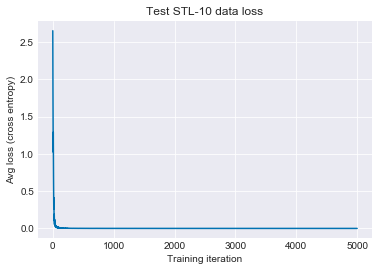

In [31]:
# Train the net with the bestparam settings
best_lr = 0.0626
best_reg = 0
best_mini_batch_sz = 20
best_hidden = 50 # this was the maximum value we let our model 
# train upto as a result of low computational power, expect to rise

bestNet = MLP(x_train.shape[1], best_hidden, 10)
loss, acc_t, acc_v = bestNet.fit(x_test, y_test, x_val, y_val,
                                 lr=best_lr, reg=best_reg, mini_batch_sz=best_mini_batch_sz, n_epochs=5000, verbose=1)
plt.plot(loss)
plt.xlabel('Training iteration')
plt.ylabel('Avg loss (cross entropy)')
plt.title('Test STL-10 data loss')
plt.show()

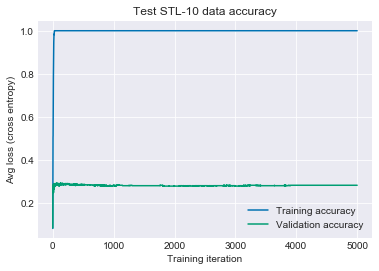

In [32]:
plt.plot(acc_t, label='Training accuracy')
plt.plot(acc_v, label='Validation accuracy')
plt.xlabel('Training iteration')
plt.ylabel('Avg loss (cross entropy)')
plt.title('Test STL-10 data accuracy')
plt.legend()
plt.show()

### e. Visualize learned weights

**TODO**: 

- In the cell below, get the weights of your best net's hidden layer (Y), reshape/transpose them so that they are `(N, 32, 32, 3)`.
- Run the `plot_weights` function to generate a grid visualization of them.

In [33]:
best_y_wts = bestNet.get_y_wts()
best_y_wts = best_y_wts.reshape((best_hidden, 32, 32, 3))

In [34]:
def plot_weights(wts):
    grid_sz = int(np.sqrt(len(wts)))
    plt.figure(figsize=(20,20))
    for x in range(grid_sz):
        for y in range(grid_sz):
            lin_ind = np.ravel_multi_index((x, y), dims=(grid_sz, grid_sz))
            plt.subplot(grid_sz, grid_sz, lin_ind+1)
            currImg = wts[lin_ind]
            low, high = np.min(currImg), np.max(currImg)
            currImg = 255*(currImg - low) / (high - low)
            currImg = currImg.astype('uint8')
            plt.imshow(currImg)
            plt.gca().axis('off')
    plt.show()

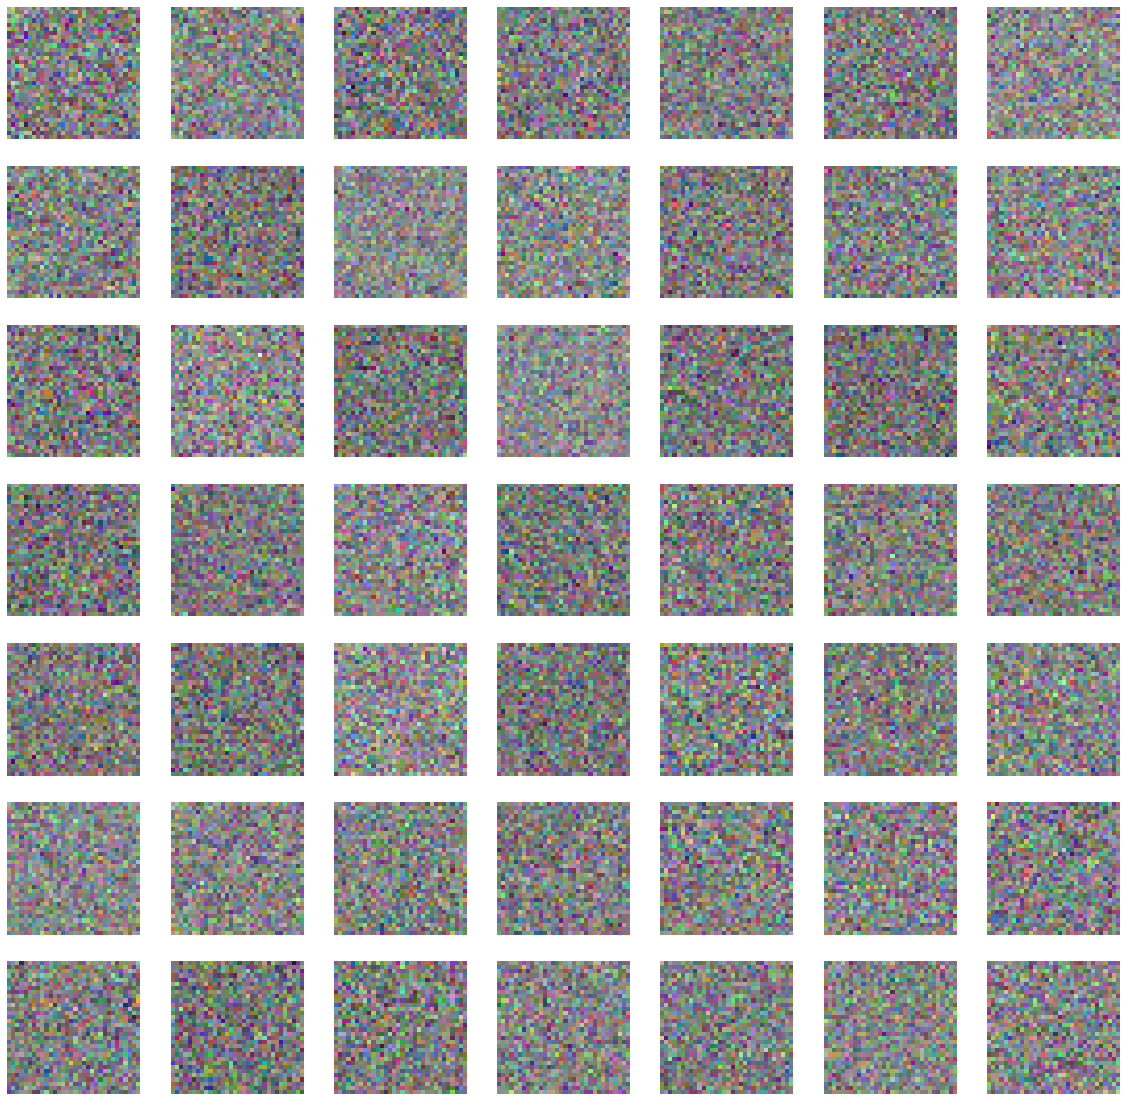

In [35]:
plot_weights(best_y_wts)

## Extensions

**Reminder**: Please do not integrate extensions into your base project so that it changes the expected behavior of core functions. It is better to duplicate the base project and add features from there.

1) Instead of computing the loss over a mini-batch, compute it over epochs instead. Compare and contrast the approaches. Be sure to include analysis figures.

2) Investigate how the single layer softmax network does with the CIS dataset. Explain and provide plots showing your results.

3) If you have time to spare (or want to throw more computing power at the STL-10 dataset), process through the SLP and MLP and tune hyperparameters with the dataset at its original resolution (96x96 images). Show images of your learned weights. Can you find a training sweet spot where the learned weight visualizations look particularly cool?

4) Implement the sigmoid classifer (same network structure, except use sigmoid for netact) with the cross-entropy loss by creating another subclass of `SingleLayerNet` and/or `MLP`. Compare and contrast results achieved by the softmax/cross-entropy network.

5) Explore the effects of batch gradient descent, stochastic gradient descent, and mini-batch gradient descent.

6) Obtain, preprocess, train, and evaluate the performance of `SingleLayerNet` and/or `MLP` on another dataset with comparable types of image features. 


# Our Extensions:
1. As our first extension we implemented an automated grid coarse to fine grid search allowing the user to choose the "step size" across which the program searches at any given fineness, and how many times the program go a level finer. The algorithm can be seen in both the softmax and mlp notebooks.
2. As our second extension, we wrote a second notebook and python file, for truly multi-layer, arbitrarily-sized networks. Usage is similar to the original mlp class, except the argument to the constructor is now a single list defining the structure of the form \[input_size, h_0, h_1, ..., h_n, num_outputs\]. We then use this new framework to define multiple multi-layer networks to work with both the CIS and STL-10 dataset. We observe an increase in performance in both cases.